# Project 1

## 1. Business Undesrtanding

The data was collected from [kaggle](https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv).  This dataset contains information on 12,500 customers spanning from the months of January through August, which makes it 100,000 observations.  The information from the dataset are financial in nature and can be used to build a machine learning algorithm that can identify/classify the customer's credit score as being "Good", "Standard", or "Poor" or the customer's credit utilization ratio.  With this information, a fanancial institution can utilize it to better attend to the customers' needs and provider better services.  Since this is a feature with 3 levels, the accuracy score would be a good method to evaluate the predictive powers of a the classification algorithm.  Another good method to use to measure the classification prediction is the F1 score because it is a measure that takes into consideration not only the true positives, but also the false negatives and the false positives.

The Interest Rate would also be a good feature for which to make predictions.  This is the feature that tells what is the interest rate charged in the credit card.  This is a numeric feature, so a good measurement of quality for a possible predictive regressive model would be the $R^2$ score and the MSE.

## 2. Data Meaning Type

The meaning of each feature of the dataset goes as follows:

* ID - Represents a unique identification of an entry.
* Customer_ID - Represents a unique identification of a person.
* Month - Represents the month of the year.
* Name - Represents the name of a person.
* Age - Represents the age of the person.
* SSN - Represents the Social Security Number of the person.
* Occupation - Represents the occupation of the person.
* Annual_Income - Represents the annual income of the person.
* Monthly_Inhand_Salary - Represents the monthly base salary of a person.
* Num_Bank_Accounts - Represents the number of bank accounts a person holds.
* Num_Credit_Card - Represonts the number of other credit cards held by a person.
* Interest_Rate - Represents the interest rate on credit card.
* Num_of_Loan - Represents the number of loans taken from the bank.
* Type_of_Loan - Represents the types of loan taken by a person.
* Delay_from_due_date - Represents the average number of days delayed from the payment date.
* Num_of_Delayed_Payment - Represents the average number of payments delayed by a person.
* Changed_Credit_Limit - Represents the percentage change in credit card limit.
* Num_Credit_Inquiries - Represents the number of credit card inquiries.
* Credit_Mix - Represents the classification of the mix of credits.
* Outstanding_Debt - Represents the remaining debt to be paid (in USD).
* Credit_Utilization_Ratio - Represents the utilization ratio of credit card.
* Credit_History_Age - Represents the age of credit history of the person.
* Payment_of_Min_Amount - Represents whether only the minimum amount was paid by the person.
* Total_EMI_per_month - Represents the monthly EMI payments (in USD).
* Amount_invested_monthly - Represents the monthly amount invested by the customer (in USD).
* Payment_Behaviour - Represents the payment behavior of the customer (in USD).
* Monthly_Balance - Represents the monthly balance amount of the customer (in USD).
* Credit_Score - Represents the bracket of credit score (Poor, Standard, Good).

As we can see from the description of each feature, features like Customer_ID, Name, and SSN are unique to each individual customer.  If such information is needed, the Customer_ID feature will be used due to the fact that it is less invasive to the customers' personal information.  What follows next is a look into the remaining features to check how they are distributed and what kind of data cleaning, if any, each feature needs.

In [1]:
# The initial libraries to be used.
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading the train.csv dataset.
df = pd.read_csv(r'train.csv', low_memory=False)
# Checking the first 5 rows of the dataframe.
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 28)

In [4]:
# Checking the features data types (Dtype) and how much data points are not missing data (Non-Null Count).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## 3.Data Quality

The data quality is not great. Most variables had to go through a cleaning process due to the presence of incorrectly entered data, outliers, and missing values.

The main issue was the features that contained missing values in them.  Those missing values were taken care of by inputing the mode, if the feature was a categorical feature, and the mean or the median, for numeric feature.  The positive note on that is that since we knew the data was a monthly data collected from the same 12,500 customers, we used the customers' own information to address the missing data issues.

Another problem that was noticed during the data cleaning part was the fact that some of the data seemed to have typos in them.  A common one would be having an underscore typo ("\_") in what should be a numeric data.  This issue was fixed by removing the "\_" and transforming the data into a numeric data when appropriate.

Lastly, there were some unusually large numeric data in some of the datapoint.  It was not necessarily part of the plan to eliminate extreme outliers and replace them with a more appropriate value, but since we did have a set of the same customers' data point for each of the features, we though it would be more realistic to eliminate those values that did not seem like they were representative of the customers' reality, such as suddenly having thousands of _Num_Credit_Card_.  There was also negative values for features were that would not be realistic, such as _Age_.  Those were taken care of in the same way by simply removing them and replacing with the median value for each individual _Customer_ID_.

In [5]:
## Null Values
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
# Checking to see how many unique customers are in the dataset.
len(df.Customer_ID.unique())

12500

### Clean Data

In [7]:
# Age
# Checking the unique values of the Age feature.
df.Age.unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [8]:
# Removing the '_' from the Age datapoints that contains it
df.Age = df.Age.str.replace('_','')
# Making the values into numeric values
df.Age = pd.to_numeric(df.Age, errors='coerce')
# Rechecking the unique values of the Age feature
df.Age.unique()

array([  23, -500,   28, ..., 4808, 2263, 1342], dtype=int64)

In [9]:
# Occupation
df.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [10]:
#Ocupation
df.Occupation = df.Occupation.replace('_______', np.nan)
df.Occupation.unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [11]:
# Annual Income
df.Annual_Income.unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [12]:
# Removing the '_' from the values
df.Annual_Income = df.Annual_Income.str.replace('_','')
# Transforming the values to numeric
df.Annual_Income = df.Annual_Income.astype('float64')
df.Annual_Income.describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [13]:
# Number of Loans
df.Num_of_Loan.unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [14]:
# Remove non-alphanumeric characters.
df.Num_of_Loan = df.Num_of_Loan.str.replace('_','')
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Num_of_Loan.describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

In [15]:
# Num of Delayed Payments
df.Num_of_Delayed_Payment.unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [16]:
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.str.replace('_','')
df.Num_of_Delayed_Payment = pd.to_numeric(df.Num_of_Delayed_Payment, errors='coerce')
df.Num_of_Delayed_Payment.describe()

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [17]:
df.Changed_Credit_Limit = pd.to_numeric(df.Changed_Credit_Limit, errors='coerce')
df.Changed_Credit_Limit.describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [18]:
df.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [19]:
df.Credit_Mix = df.Credit_Mix.replace('_', np.nan)
df.Credit_Mix.unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [20]:
df.Outstanding_Debt.unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [21]:
df.Outstanding_Debt = df.Outstanding_Debt.str.replace('_','')
df.Outstanding_Debt = pd.to_numeric(df.Outstanding_Debt, errors='coerce')
df.Outstanding_Debt.describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

In [22]:
# Payment_of_Min_Amount
df.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [23]:
## Delete Invalid Responses
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.replace('NM', np.nan)
## Null after Replacements
df.Payment_of_Min_Amount.isnull().sum()

12007

In [24]:
## Amount Invested Monthly
df.Amount_invested_monthly.unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

In [25]:
## Delete Invalid Responses
df.Amount_invested_monthly = pd.to_numeric(df.Amount_invested_monthly, errors='coerce')
df.Amount_invested_monthly.isnull().sum()

8784

In [26]:
## Payment Behaviour
df.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [27]:
## Delete Invalid Responses
df.loc[df.Payment_Behaviour == '!@9#%8', "Payment_Behaviour"] = np.nan
df[df.Payment_Behaviour.isna()].shape[0]

7600

In [28]:
## Monthly Balance
df.Monthly_Balance.unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., '516.8090832742814', '319.1649785257098', '393.6736955618808'],
      dtype=object)

In [29]:
## Delete Invalid Responses
df.Monthly_Balance = pd.to_numeric(df.Monthly_Balance, errors='coerce')
df.Monthly_Balance.isnull().sum()

1209

## 4.Simple Statistics

The table below shows that variables such as Age, Number of Bank Accounts, Number of Credit Cards, interest rate, and Number of Loans need to be examined closely. 

In [30]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,91216.000000,98791.000000
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,195.539456,402.551258
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,199.564527,213.925499
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,72.236692,270.106630
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.731225
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,236.815814,470.262938
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


### Age 

The _Age_ feature was initially shown as being a categorical (Object dtype) feature, and not numeric as it is expected to be.  Now it is time to take a closer look into it and fix this issue as best as we can.

In [31]:
# Checking the descriptive statistics of the Age feature
df.Age.describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

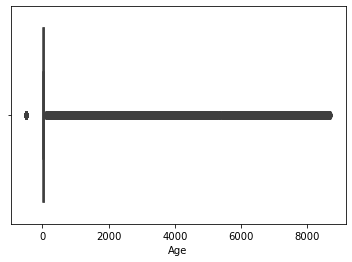

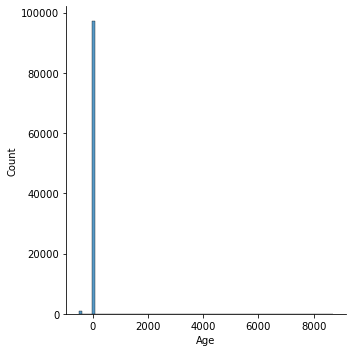

In [32]:
sns.boxplot(x = df['Age'])
sns.displot(df['Age'], bins=80, kde=False)

In [33]:
## Max Age and negative numbers are unrealistic
## Large and negative Numbers are Deleted
df.loc[df.Age < 0, 'Age'] = np.nan
df.loc[df.Age > 90, 'Age'] = np.nan
df.Age.describe()

count    97219.000000
mean        33.320009
std         10.769558
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

In [34]:
## Impute Missing Values Based on Median Age Grouped by Customer ID
df.Age = df['Age'].fillna(df.groupby('Customer_ID')['Age'].transform('median'))

In [35]:
df.Age.describe()

count    100000.00000
mean         33.31146
std          10.76473
min          14.00000
25%          24.00000
50%          33.00000
75%          42.00000
max          56.00000
Name: Age, dtype: float64

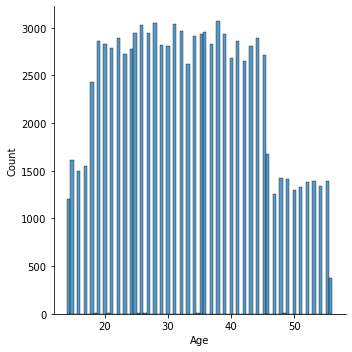

In [36]:
sns.displot(df['Age'], bins=80, kde=False)

The _Age_ feature first showed some values that not only were categorical, they also contained an "\_" within them.  After removing this "\_" from the value, we were able to transform it into a numerical data.  Upon checking the numerical distribution of the feature, we noticed that some of the values did not make sence, they were either unrealistic high, with a max of 8698, or negative.  Those values were then removed and replaced with the median value of each customer.

### Month

The month feature identifies which month of the year the data point comes from.

In [37]:
# Checking the unique values in the month feature
df.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [38]:
# Checking how many unique Customer_ID are identified by each Month
for i in df.Month.unique():
    print(i + ":", len(df[df.Month == i].Customer_ID.unique()))

January: 12500
February: 12500
March: 12500
April: 12500
May: 12500
June: 12500
July: 12500
August: 12500


In [39]:
## Create a Coumn with Months as Integers
df['Month_Number']= df.Month.replace('January', 1).replace('February', 2).replace('March', 3).replace('April', 4).replace('May', 5).replace('June', 6).replace('July', 7).replace('August', 8).replace('September', 9).replace('October', 10).replace('November', 11).replace('December', 12)
df.Month_Number.describe()

count    100000.000000
mean          4.500000
std           2.291299
min           1.000000
25%           2.750000
50%           4.500000
75%           6.250000
max           8.000000
Name: Month_Number, dtype: float64

We can see that the dataset does in fact contain 8 different months spanning from January to August.  We can also see that each month can identify 12,500 unique values of the _Customer_ID_ feature, which we saw earlier is exactly the amount of unique _Customer_ID_ the data set contains.  12,500 x 8 will give us precisely the right amount of observations (rows) the data set has in total.  This indicates that the _Month_ and the _Customer_ID_ data is what they should be and that each customer data truly is taken from each of the month represented in the _Month_ feature.

### Occupation

Originally there were no missing values under Occupation but some values were lost during the data cleaning process.

In [40]:
df.Occupation.describe()

count      92938
unique        15
top       Lawyer
freq        6575
Name: Occupation, dtype: object

In [41]:
## Impute Missing Values Based on Mode SSN Grouped by Customer ID
df.Occupation =  df.groupby(['Customer_ID'], sort=False)['Occupation'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df.Occupation.describe()

count     100000
unique        15
top       Lawyer
freq        7096
Name: Occupation, dtype: object

The _Occupation_ feature did not necessarily contain any missing values.  However, it did contain a value that cannot be considered inteligible for the feature, the '\_\_\_\_\_\_\_' value.  That was taken care of by removing it and then replacing it with the mode of each individual _Customer_ID_.

### Annual Income

There are no missing values in this feature, but we will need to transform it into numeric.  Before that we will fix some of the abnormalities that may exist.

In [42]:
df.Annual_Income.describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

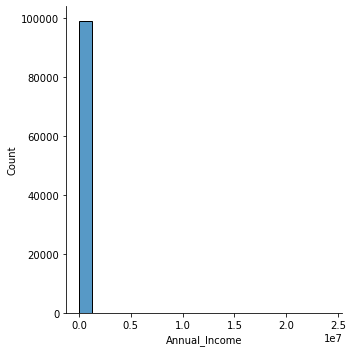

In [43]:
sns.displot(df['Annual_Income'], bins=20, kde=False)

As shown on the graph above, Annual Income has a few extreme values that need to be revised

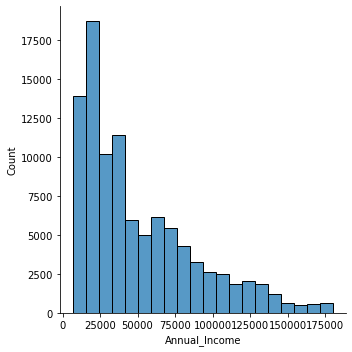

In [44]:
# Remove Extreme Values
df.loc[df.Annual_Income > 250000, 'Annual_Income'] = np.nan
df.Occupation =  df.groupby(['Annual_Income'], sort=False)['Annual_Income'].apply(lambda x: x.fillna(x.mode().iloc[0]))
sns.displot(df['Annual_Income'], bins=20, kde=False)

Though no missing values was noticed in the _Annual_Income_ feature, the values of this feature was set to categorical (Object) and some of them contained an "\_" in them.  After removing the "\_" all that was needed was to tranform the values into numerical, more specific a float data type. Extreme values were treated as incorrectly entered data and removed. Missing values were imputed using the mode of each customer id's Annual Income. 

### Monthly Inhand Salary

This feature was already set as a numeric feature, but there are some values missing.  Our goal here is to fix those missing values.

In [45]:
df.Monthly_Inhand_Salary.describe()

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

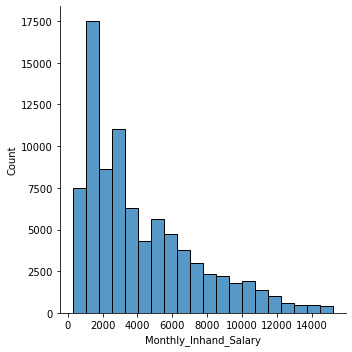

In [46]:
sns.displot(df['Monthly_Inhand_Salary'], bins=20, kde=False)

In [47]:
##Count Number of Missing Values
df.Monthly_Inhand_Salary.isnull().sum()

15002

In [48]:
## Impute Missing Data by Using the Median Grouped by Customer ID
df.Monthly_Inhand_Salary = df['Monthly_Inhand_Salary'].fillna(df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform('median'))
df.Monthly_Inhand_Salary.describe()

count    100000.000000
mean       4198.490149
std        3187.491752
min         303.645417
25%        1626.761667
50%        3095.978333
75%        5961.637500
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

The only issue found in the _Monthly_Inhand_Salary_ feature was the missing values.  That was taken care of by inputing the median value according to each individual _Customer_ID_.

### Number of Bank Accounts

The feature is already numerical and it does not contain any missing values.  A closer look at its distribution and descriptive statistics will be done to see if anything needs to be fixed.

In [49]:
df.Num_Bank_Accounts.describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

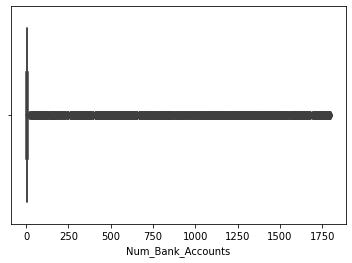

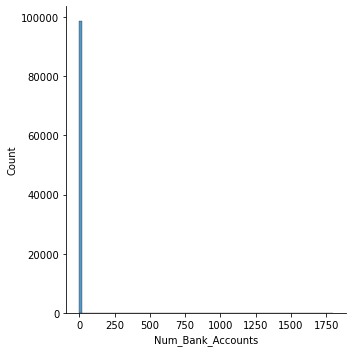

In [50]:
sns.boxplot(x = df['Num_Bank_Accounts'])
sns.displot(df['Num_Bank_Accounts'], bins=100, kde=False)

In [51]:
## Extemely Large Numbers are Unrealistic
## Large and negative Numbers are Deleted
df.loc[df.Num_Bank_Accounts < 0, 'Num_Bank_Accounts'] = np.nan
df.loc[df.Num_Bank_Accounts > 11, 'Num_Bank_Accounts'] = np.nan
df.Num_Bank_Accounts.describe()

count    98664.000000
mean         5.368980
std          2.592451
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Bank_Accounts, dtype: float64

In [52]:
## Impute Missing Values Based on Median Num_Bank_Accounts Grouped by Customer ID
df.Num_Bank_Accounts = df['Num_Bank_Accounts'].fillna(df.groupby('Customer_ID')['Num_Bank_Accounts'].transform('median'))
##Count Number of Missing Values After Imputation
df.Num_Bank_Accounts.isnull().sum()

0

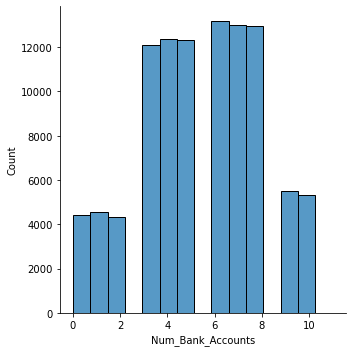

In [53]:
## Num_Bank_Accounts Distribution After transformation
sns.displot(df['Num_Bank_Accounts'], bins=15, kde=False)

The issue found in the _Number_of_Bank_Account_ feature is that some datapoints showed a negative amount and unusual high quantities.  Those values were fixed by removing them and replacing with the median value for each of the _Customer_ID_.

### Number of Credit Cards

The feature is already numerical without any missing values.  Checking its distribution and descriptive statistics may reveal anything that may need to be fixed.

In [54]:
df.Num_Credit_Card.describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [55]:
# Checking customers that may have over 1000 as the Num_Credt_Card value
df[df.Num_Credit_Card > 1000][["Customer_ID", "Num_Credit_Card"]]

,Customer_ID,Num_Credit_Card
10,CUS_0x21b1,1385
40,CUS_0x95ee,1288
157,CUS_0x4100,1029
207,CUS_0x4d43,1381
324,CUS_0xb5ff,1005
...,...,...
99289,CUS_0x48a,1227
99434,CUS_0x62f4,1180
99592,CUS_0x94de,1300
99605,CUS_0x5d6d,1255


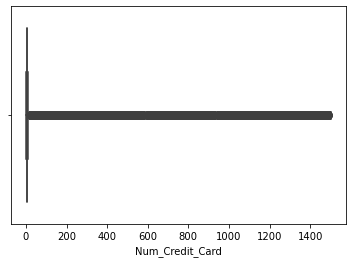

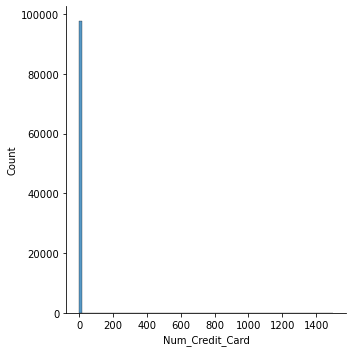

In [56]:
sns.boxplot(x = df['Num_Credit_Card'])
sns.displot(df['Num_Credit_Card'], bins=100, kde=False)

In [57]:
## Extemely Large Numbers are Unrealistic
## Extremely Large Numbers are Deleted
df.loc[df.Num_Credit_Card > 11, 'Num_Credit_Card'] = np.nan
df.Num_Credit_Card.describe()

count    97729.000000
mean         5.533322
std          2.067703
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

In [58]:
## Impute Missing Values Based on Median Num_Credit_Card Grouped by Customer ID
df.Num_Credit_Card = df['Num_Credit_Card'].fillna(df.groupby('Customer_ID')['Num_Credit_Card'].transform('median'))
##Count Number of Missing Values After Imputation
df.Num_Bank_Accounts.isnull().sum()

0

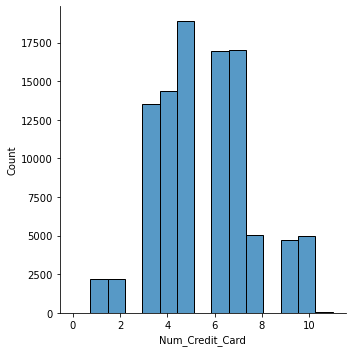

In [59]:
## Num_Bank_Accounts Distribution After transformation
sns.displot(df['Num_Credit_Card'], bins=15, kde=False)

We could notice that some customers had an unusual value for the _Num_Credit_Card_ value.  Those large values were then removed and replaced with the median value of each individual _Customer_ID_.

### Interest Rates

This feature is numerical and has no missing values.  A closer look at the distribution and descriptive statistics may point to possible mistakes that may need to be fixed.

In [60]:
df.Interest_Rate.describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

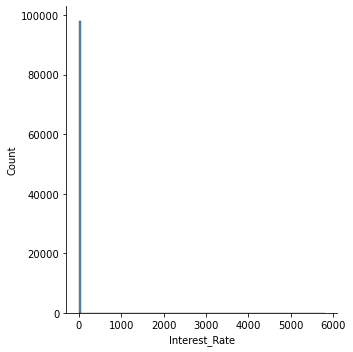

In [61]:
sns.displot(df['Interest_Rate'], bins=100, kde=False)

In [62]:
df.Interest_Rate.quantile(0.97)

34.0

In [63]:
## Interest Rates Higher than 97% of all interest rates are considered Outliers and Deleted
df.loc[df.Interest_Rate > df.Interest_Rate.quantile(0.97), 'Interest_Rate'] = np.nan
df.Interest_Rate.describe()

count    97966.000000
mean        14.531603
std          8.739748
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [64]:
df.Interest_Rate.isnull().sum()

2034

In [65]:
## Impute Missing Values Based on Median Num_Bank_Accounts Grouped by Customer ID
df.Interest_Rate = df['Interest_Rate'].fillna(df.groupby('Customer_ID')['Interest_Rate'].transform('median'))
##Count Number of Missing Values After Imputation
df.Interest_Rate.isnull().sum()

0

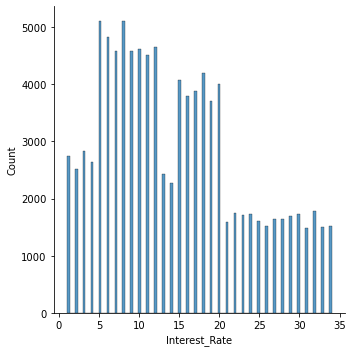

In [66]:
## Histogram of Interest Rates After Imputation
sns.displot(df['Interest_Rate'], bins=100, kde=False)

Some of the _Interest_Rate_ value seemed unreasonably too high.  To fix that, we found the 97th percentile and all of the numbers above that were removed and replaced with the median for each individual _Customer_ID_.

### Number of Loans

Intuitively this feature should be a numeric feature.  However, it was entered as a categorical (Object) feature.  Since this was the case with some of the previous features, we will remove unusual characters from the values and transform them into numerical values.  After that we will check the distribution and the descriptive statistics to see if more work will need to be done.

In [67]:
df.Num_of_Loan.describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

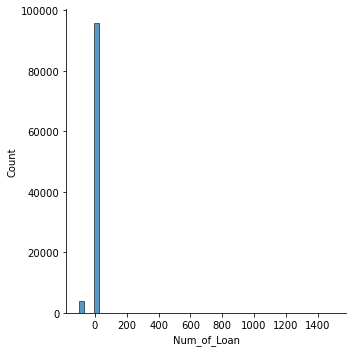

In [68]:
sns.displot(df['Num_of_Loan'], bins=50, kde=False)

In [69]:
## Number of Loans Higher than 97% and less than 0 are considered Outliers and Deleted
df.loc[df.Num_of_Loan < 0, 'Num_of_Loan'] = np.nan
df.loc[df.Num_of_Loan > df.Num_of_Loan.quantile(0.97), 'Num_of_Loan'] = np.nan
df.Num_of_Loan.describe()

count    95652.000000
mean         3.533758
std          2.447308
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

In [70]:
## Null Values after Deleting Outliers
df.Num_of_Loan.isnull().sum()

4348

In [71]:
## Impute Missing Values Based on Median Num_of_Loan Grouped by Customer ID
df.Num_of_Loan = df['Num_of_Loan'].fillna(df.groupby('Customer_ID')['Num_of_Loan'].transform('median'))
##Count Number of Missing Values After Imputation
df.Num_of_Loan.isnull().sum()

0

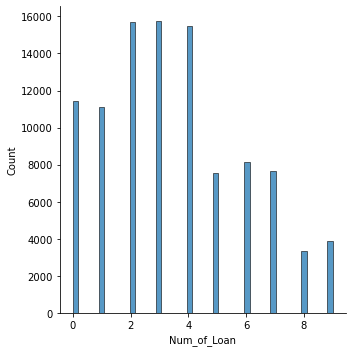

In [72]:
## Visualize Data After Imputation 
sns.displot(df['Num_of_Loan'], bins=50, kde=False)

The values for the _Num_of_Loan_ not only were set as Object, some of them also had an underscore ("\_") character in them.  After removing the "\_" and transforming the values to numeric, we also noticed that there were some unusually high values.  Those high values were taken care of by removing the values that were higher than the 97 percentile and replacing them with the median of each individual _Customer_ID_.

### Types of Loan

This feature contains values that are listed.  In other words, the customer who have more than 1 type of Loan will have those types as a list under this feature.  Because of this, this feature can be considered unorganized.  However, the information from this feature can be used to make new features that can inform us how many loans of each type does each customer have.  This will be done by counting how many of each type of loan is in each individual list for each individual customer.

In [73]:
df['Auto_Loan'] = df.Type_of_Loan.str.count('Auto Loan')
df['Credit_Builder_Loan'] = df.Type_of_Loan.str.count('Credit-Builder Loan')
df['Not_Specified_Loan'] = df.Type_of_Loan.str.count('Not Specified')
df['Personal_Loan'] = df.Type_of_Loan.str.count('Personal Loan')
df['Payday_Loan'] = df.Type_of_Loan.str.count('Payday Loan')
df['Mortgage_Loan'] = df.Type_of_Loan.str.count('Mortgage Loan')
df['Home_Equity_Loan'] = df.Type_of_Loan.str.count('Home Equity Loan')
df['Debt_Consolidation_Loan'] = df.Type_of_Loan.str.count('Debt Consolidation Loan')
df['Student_Loan'] = df.Type_of_Loan.str.count('Student Loan')

In [74]:
# Fill null values with 0's
df.Auto_Loan = df['Auto_Loan'].fillna(0)
df.Credit_Builder_Loan = df['Credit_Builder_Loan'].fillna(0)
df.Not_Specified_Loan = df['Not_Specified_Loan'].fillna(0)
df.Personal_Loan = df['Personal_Loan'].fillna(0)
df.Payday_Loan = df['Payday_Loan'].fillna(0)
df.Mortgage_Loan = df['Mortgage_Loan'].fillna(0)
df.Home_Equity_Loan = df['Home_Equity_Loan'].fillna(0)
df.Debt_Consolidation_Loan = df['Debt_Consolidation_Loan'].fillna(0)
df.Student_Loan = df['Student_Loan'].fillna(0)

### Delay From Due Date

This feature does not have any missing values and it is already set up as numeric.  We only need to observe the distribution and the descriptive statistics to see if any changes need to be made.

In [75]:
df.Delay_from_due_date.describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Count'>

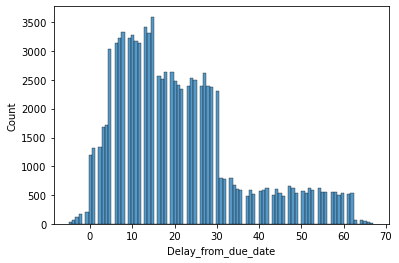

In [76]:
sns.histplot(x = "Delay_from_due_date", data = df)

Nothing unusual can be observed in this feature.  There is some negative amounts, which can be interpreted as, insteade of delays, payments made ahead of time.  Because of that, no changes will be made to this feature.

### Number of Delayed Payments

This feature is set as categorical.  The plan is to fix is looking for unsual characters in each value then transforming them into numeric.  After fixing that, we must also fix the rows with missing values.

In [77]:
df.Num_of_Delayed_Payment.describe()

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [78]:
df.Num_of_Delayed_Payment = df['Num_of_Delayed_Payment'].fillna(df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform('median'))
df.Num_of_Delayed_Payment = np.round(df.Num_of_Delayed_Payment)
df.Num_of_Delayed_Payment.describe()

count    100000.000000
mean         29.693640
std         218.027051
min          -3.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [79]:
df.Num_of_Delayed_Payment.quantile(0.99)

27.0

C:\Users\llealfilho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Num_of_Delayed_Payment', ylabel='Density'>

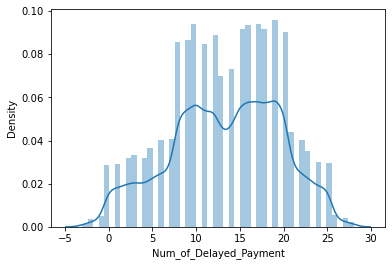

In [80]:
sns.distplot(df[df.Num_of_Delayed_Payment < 30].Num_of_Delayed_Payment)

In [81]:
df.loc[df.Num_of_Delayed_Payment > 30, "Num_of_Delayed_Payment"] = np.nan
df.Num_of_Delayed_Payment = df['Num_of_Delayed_Payment'].fillna(df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform('median'))
df.Num_of_Delayed_Payment.describe()

count    100000.000000
mean         13.316090
std           6.302088
min          -3.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          28.000000
Name: Num_of_Delayed_Payment, dtype: float64

For this feature we first fixed the values by removing the "\_" from the datapoints that contained it and then transformed it into numeric values.  The missing values were filled using the median values of each individual _Customer_ID_.  Lastly, some extreme outliers were found and were replaced by removing them and replacing with the median value of each _Customer_ID_.

### Changed Credit Limit

This feature contains missing values and is also set as a categorical feature when it should be numerical.  Once again, we need to first transform it into numerical and then fill the missing values.  After taking care of those issues, we can check its distribution and descriptive statistics to see if any more changes should be made to take care of any possible errors.

In [82]:
df.Changed_Credit_Limit.describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [83]:
df.Changed_Credit_Limit = df.Changed_Credit_Limit.fillna(df.groupby('Customer_ID')['Changed_Credit_Limit'].transform('median'))
df.Changed_Credit_Limit.describe()

count    100000.000000
mean         10.389113
std           6.783421
min          -6.490000
25%           5.340000
50%           9.400000
75%          14.850000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

<AxesSubplot:xlabel='Changed_Credit_Limit', ylabel='Count'>

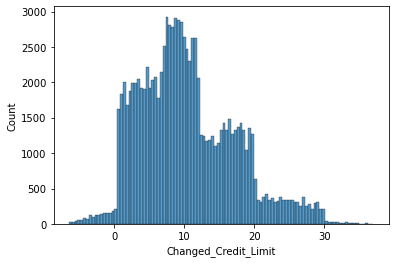

In [84]:
sns.histplot(x = "Changed_Credit_Limit", data = df)

The only changes made to the _Changed_Credit_Limit_ feature was the transformation into a numeric feature and then filling the missing values with the median of each individual _Customer_ID_.

### Number of Credit Inquiries

This feature is already set as numeric, but it does have some missing values.  We will fix the missing values and then check its distribution and descriptive statistics to see if any more changes should be made.

In [85]:
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.fillna(df.groupby("Customer_ID")["Num_Credit_Inquiries"].transform("median"))

In [86]:
df.Num_Credit_Inquiries.describe()

count    100000.000000
mean         27.321850
std         191.295092
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

<AxesSubplot:xlabel='Num_Credit_Inquiries', ylabel='Count'>

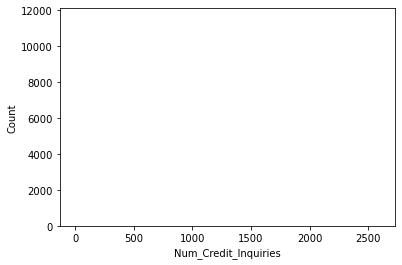

In [87]:
sns.histplot(x = "Num_Credit_Inquiries", data = df)

In [88]:
df.Num_Credit_Inquiries.quantile(.97)

15.0

In [89]:
print(df[df.Num_Credit_Inquiries > 15].Num_Credit_Inquiries.shape)
print(df[df.Num_Credit_Inquiries > 17].Num_Credit_Inquiries.shape)
print(df[df.Num_Credit_Inquiries > 25].Num_Credit_Inquiries.shape)

(2405,)
(1650,)
(1650,)


In [90]:
df.loc[df.Num_Credit_Inquiries > 25,"Num_Credit_Inquiries"] = np.nan
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.fillna(df.groupby("Customer_ID")["Num_Credit_Inquiries"].transform("median"))
df.Num_Credit_Inquiries.describe()

count    100000.000000
mean          5.780205
std           3.861899
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64

<AxesSubplot:xlabel='Num_Credit_Inquiries', ylabel='Count'>

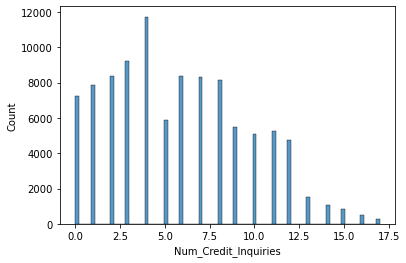

In [91]:
sns.histplot(x = "Num_Credit_Inquiries", data = df)

The _Num_Credit_Inquiries_ feature was already numeric, but it had missing values.  The missing values were filled with the median values for each individual _Customer_ID_.  The next thid noticed in the descriptive statistics and the histogram was has it contained a few extreme outlier values that were unrealistic.  Those values were dealt with by removing the values above 25, because it affected the least amount of total values and it was 10 units above the 97 percentile thus making it an extreme outlier, and then replacing them with the median values for each individual _Customer_ID_.

### Credit Mix

This is a categorical feature that is not missing any values.  We will check and see if any of the values needs to be changed due to typos or because it is not inteligible.

In [92]:
df.Credit_Mix.describe()

count        79805
unique           3
top       Standard
freq         36479
Name: Credit_Mix, dtype: object

In [93]:
df.Credit_Mix.isnull().sum()

20195

In [94]:
## Impute Missing Values Based on Mode Credit Mix Grouped by Customer ID
df.Credit_Mix =  df.groupby(['Customer_ID'], sort=False)['Credit_Mix'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df.Credit_Mix.describe()

count       100000
unique           3
top       Standard
freq         45848
Name: Credit_Mix, dtype: object

The _Credit_Mix_ feature is a categorical feature so the only thing that needed to be done to it was to fix the datapoints that had a "\_" as a value.  Those points were considered as missing values which were then filled with the mode for each individual _Customer_ID_.

### Outstanding Debt

This feature should be transformed into numerical.  The process then will be to see if any values needs to be fixed before turning them all into numerical values.

In [95]:
df.Outstanding_Debt.describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

<AxesSubplot:xlabel='Outstanding_Debt', ylabel='Count'>

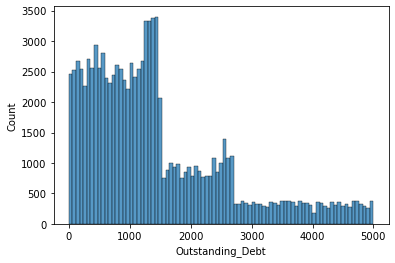

In [96]:
sns.histplot(x = "Outstanding_Debt", data = df)

The _Oustanding_Debt_ feature was set as a categorical feature.  Before transforming it to numeric, we fixed the values that contained a "\_" in them by removing the "\_" from them.

### Credit Utilization Ratio

This feature does not contain any missing values and it already is set as a numerical feature.  We will check its distribution and descriptive statistics to see if any abnormality can be found.

In [97]:
df.Credit_Utilization_Ratio.describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

<AxesSubplot:xlabel='Credit_Utilization_Ratio', ylabel='Count'>

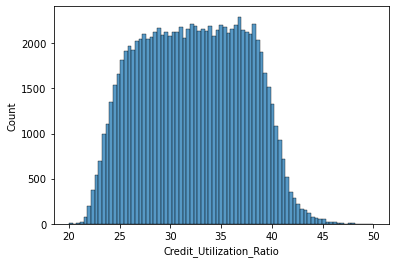

In [98]:
sns.histplot(x = "Credit_Utilization_Ratio", data = df)

The _Credit_Utilization_Ratio_ did not show anything unusual in it.  The values are spread out from 20 to 50 and there was no missing values in it.  No changes was made to this feature.

### Credit History Age

This feature is set up as a categorical feature and it has missing values.  Both of those issues will be addressed in this part of the project.

In [99]:
df.Credit_History_Age.describe()

count                      90970
unique                       404
top       15 Years and 11 Months
freq                         446
Name: Credit_History_Age, dtype: object

In [100]:
df.Credit_History_Age.head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

In [101]:
# Transforming the values into month based values.  In other words, the Credit History is then going to be valued by month.
df.Credit_History_Age = pd.to_numeric(df.Credit_History_Age.str.split(" ").str[0]) * 12 + pd.to_numeric(df.Credit_History_Age.str.split(" ").str[3])

In [102]:
df.Credit_History_Age.describe()

count    90970.000000
mean       221.195405
std         99.741364
min          1.000000
25%        144.000000
50%        219.000000
75%        302.000000
max        404.000000
Name: Credit_History_Age, dtype: float64

In [103]:
# Impute Missing Values
df2 = df.pivot_table(index = "Month_Number", columns = "Customer_ID", values = "Credit_History_Age")

In [104]:
df2.iloc[0,:] = df2.iloc[0,:].fillna(df2.iloc[1,:] - 1)
df2.iloc[0,:] = df2.iloc[0,:].fillna(df2.iloc[2,:] - 2)
df2.iloc[0,:] = df2.iloc[0,:].fillna(df2.iloc[3,:] - 3)
df2.iloc[0,:] = df2.iloc[0,:].fillna(df2.iloc[4,:] - 4)

In [105]:
df2.iloc[1,:] = df2.iloc[1,:].fillna(df2.iloc[0,:] + 1)
df2.iloc[2,:] = df2.iloc[2,:].fillna(df2.iloc[0,:] + 2)
df2.iloc[3,:] = df2.iloc[3,:].fillna(df2.iloc[0,:] + 3)
df2.iloc[4,:] = df2.iloc[4,:].fillna(df2.iloc[0,:] + 4)
df2.iloc[5,:] = df2.iloc[5,:].fillna(df2.iloc[0,:] + 5)
df2.iloc[6,:] = df2.iloc[6,:].fillna(df2.iloc[0,:] + 6)
df2.iloc[7,:] = df2.iloc[7,:].fillna(df2.iloc[0,:] + 7)

In [106]:
cid = list(df.Customer_ID.unique())

In [107]:
for i in cid:
    df.loc[df.Customer_ID == i, "Credit_History_Age"] = list(df2.loc[:,i])

In [108]:
df.Credit_History_Age.describe()

count    100000.000000
mean        221.206880
std          99.681112
min           1.000000
25%         144.000000
50%         219.000000
75%         302.000000
max         404.000000
Name: Credit_History_Age, dtype: float64

In [109]:
df.Credit_History_Age.head(24)

0     265.0
1     266.0
2     267.0
3     268.0
4     269.0
5     270.0
6     271.0
7     272.0
8     319.0
9     320.0
10    321.0
11    322.0
12    323.0
13    324.0
14    325.0
15    326.0
16    213.0
17    214.0
18    215.0
19    216.0
20    217.0
21    218.0
22    219.0
23    220.0
Name: Credit_History_Age, dtype: float64

The _Credit_History_Age_ feature had values that were counting up the customers' credit history by year and month, but its values were written as a string which made it a categorical feature.  From the string we pulled the year value and multiplied it by 12 then we added the month value to get the final _Credit_History_Age_ in a month value.  The missing values then were fixed by following the pattern.  For example we could use the value from the month before and/or after to find the value of the month that was missing by simply adding and/or subtracting to them.

### Payment of Min Amount

This feature correspond to whether only the minimum amount was paid by the customer.  There are no missing values to it, but we can still see whether there are values that needs to be fixed since this is a binary response ("yes" or "no") type of feature.

In [110]:
df.Payment_of_Min_Amount.describe()

count     87993
unique        2
top         Yes
freq      52326
Name: Payment_of_Min_Amount, dtype: object

In [111]:
## Impute Payment of Minimum Amount based on the mode
df.Payment_of_Min_Amount =  df.groupby(['Customer_ID'], sort=False)['Payment_of_Min_Amount'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df.Payment_of_Min_Amount.describe()

count     100000
unique         2
top          Yes
freq       59432
Name: Payment_of_Min_Amount, dtype: object

The _Payment_of_Min_Amount_ feature is a feature that seeks to answer whether only the minimum amount was paid.  Since this is a "Yes" or "No" question, the rows that contained "NM" were removed and replaced with each individuals _Customer_ID_'s mode value for that feature.

### Total EMI Per Month

This feature is already set up as numeric and there are no missing values in it.  What will be done in here is check the distribution and the descriptive statistics to see if there are unusual values and fix them.

In [112]:
df.Total_EMI_per_month.describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

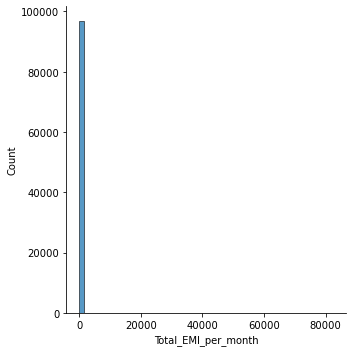

In [113]:
sns.displot(df['Total_EMI_per_month'], bins=50, kde=False)

In [114]:
##df.Total_EMI_per_month.quantile(0.97)
df.loc[df.Total_EMI_per_month > df.Total_EMI_per_month.quantile(0.97), 'Total_EMI_per_month'] = np.nan
df.Total_EMI_per_month.isnull().sum()

3000

In [115]:
df.Total_EMI_per_month.unique().shape

(12009,)

In [116]:
df.Total_EMI_per_month = df.Total_EMI_per_month.fillna(df.groupby("Customer_ID")['Total_EMI_per_month'].transform('median'))
df.Total_EMI_per_month.describe()

count    100000.000000
mean        111.269527
std         172.074218
min           0.000000
25%          29.289365
50%          66.539222
75%         147.695329
max        4655.000000
Name: Total_EMI_per_month, dtype: float64

In [117]:
df.Total_EMI_per_month.unique().shape

(12011,)

<AxesSubplot:xlabel='Total_EMI_per_month', ylabel='Count'>

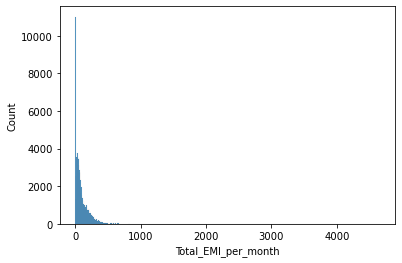

In [118]:
sns.histplot(x = "Total_EMI_per_month", data = df)

In [119]:
df[df.Total_EMI_per_month > 1000].Total_EMI_per_month

540      3864.000000
565      1293.505449
566      1293.505449
567      1293.505449
811      1320.549063
            ...     
98302    3466.000000
98471    1283.000000
99239    1179.253921
99519    1494.838012
99795    3186.000000
Name: Total_EMI_per_month, Length: 420, dtype: float64

The _Total_EMI_per_month_ did have some unusual values.  This is because there are some very extreme values that are unusual for the customer since there are months of data on each one of them.  Those values were taken care of by simply removing the values that were above the 97 percentile and replacing them with the median for each individual _Customer_ID_.

### Amount Invested Monthly

This feature has missing values and it was set up as a categorical feature.  The objective in here is to transform the values into numerical values and fill all of the missing values.

In [120]:
df.Amount_invested_monthly.describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

In [121]:
df.loc[:,["Month","Customer_ID", "Amount_invested_monthly"]].head(16)

,Month,Customer_ID,Amount_invested_monthly
0,January,CUS_0xd40,80.415295
1,February,CUS_0xd40,118.280222
2,March,CUS_0xd40,81.699521
3,April,CUS_0xd40,199.458074
4,May,CUS_0xd40,41.420153
5,June,CUS_0xd40,62.430172
6,July,CUS_0xd40,178.344067
7,August,CUS_0xd40,24.785217
8,January,CUS_0x21b1,104.291825
9,February,CUS_0x21b1,40.391238


In [122]:
df.Amount_invested_monthly = df['Amount_invested_monthly'].fillna(df.groupby('Customer_ID')['Amount_invested_monthly'].transform('mean'))
df.Amount_invested_monthly.describe()

count    100000.000000
mean        195.751837
std         195.116198
min           0.000000
25%          74.599540
50%         131.209101
75%         239.479981
max        1977.326102
Name: Amount_invested_monthly, dtype: float64

<AxesSubplot:xlabel='Amount_invested_monthly', ylabel='Count'>

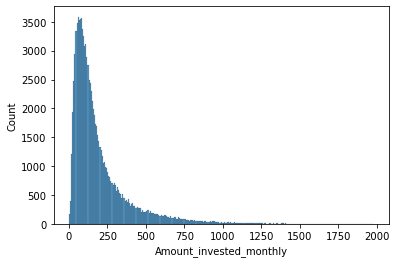

In [123]:
sns.histplot(x = "Amount_invested_monthly", data = df)

The _Amount_invested_monthly_ was set with Object data types, which was then transformed into numeric. The missing values was filled with the mean values of each individual _Customer_ID_.  The distribution and the descriptive statistics does not show anything out of the ordinary so no more changes is needed for this feature.

### Payment Behaviour

This is a categorical feature that does not contain any rows with missing values.  The goal here then is to which are the unique values for this feature and whether there are unusual values that needs to be changed.

In [124]:
df.Payment_Behaviour.describe()

count                              92400
unique                                 6
top       Low_spent_Small_value_payments
freq                               25513
Name: Payment_Behaviour, dtype: object

In [125]:
df.Payment_Behaviour =  df.groupby(['Customer_ID'], sort=False)['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

The only issue found in _Payment_Behaviour_ was the fact that there were rows with '!@9#%8' as a value.  Since this is an inteligible value for this feature, it was removed from the rows and replaced with the mode of each individual _Customer_ID_.

### Monthly Balance

The feature has some missing values and is set up as a categorical feature.  The intent then is to make the values numeric, and then fill out all of the missing values.  After that the features distribution and descriptive statistics will be checked to see if any further changes should be made.

In [126]:
df.Monthly_Balance.describe()

count    98791.000000
mean       402.551258
std        213.925499
min          0.007760
25%        270.106630
50%        336.731225
75%        470.262938
max       1602.040519
Name: Monthly_Balance, dtype: float64

In [127]:
df.Monthly_Balance = df['Monthly_Balance'].fillna(df.groupby('Customer_ID')['Monthly_Balance'].transform('mean'))
df.Monthly_Balance.describe()

count    100000.000000
mean        403.120320
std         214.014558
min           0.007760
25%         270.189030
50%         337.114461
75%         471.570652
max        1602.040519
Name: Monthly_Balance, dtype: float64

<AxesSubplot:xlabel='Monthly_Balance', ylabel='Count'>

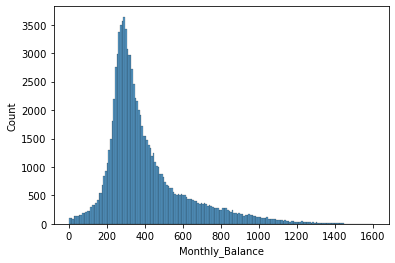

In [128]:
sns.histplot(x = "Monthly_Balance", data = df)

After transforming the values into numeric, the missing values of the _Monthly_Balance_ was filled by using the mean values of each individual _Customer_ID_.

### Credit Score

This feature is already set up as the proper data type (Object) and there are no missing values.  This is then a good opportunity to graphically see how many of each level are there is the entire dataset.

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

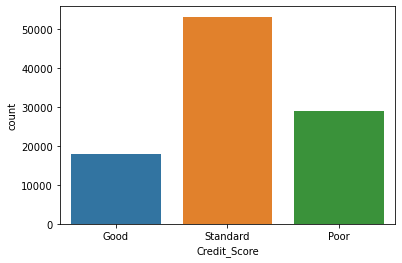

In [129]:
sns.countplot(data = df, x= "Credit_Score")

From the graph we can see that most of the customers' _Credit_Score_ are "Standard".  Though the "Good" are the lowest, they do not seem to be too far off from the "Poor" level for this feature.

## 5. Visualize Attributes

In [130]:
import matplotlib.pyplot as plt
import matplotlib

In [131]:
sns.set()
matplotlib.rc('axes', edgecolor = (0, .65, 0, .1))

### Credit Score

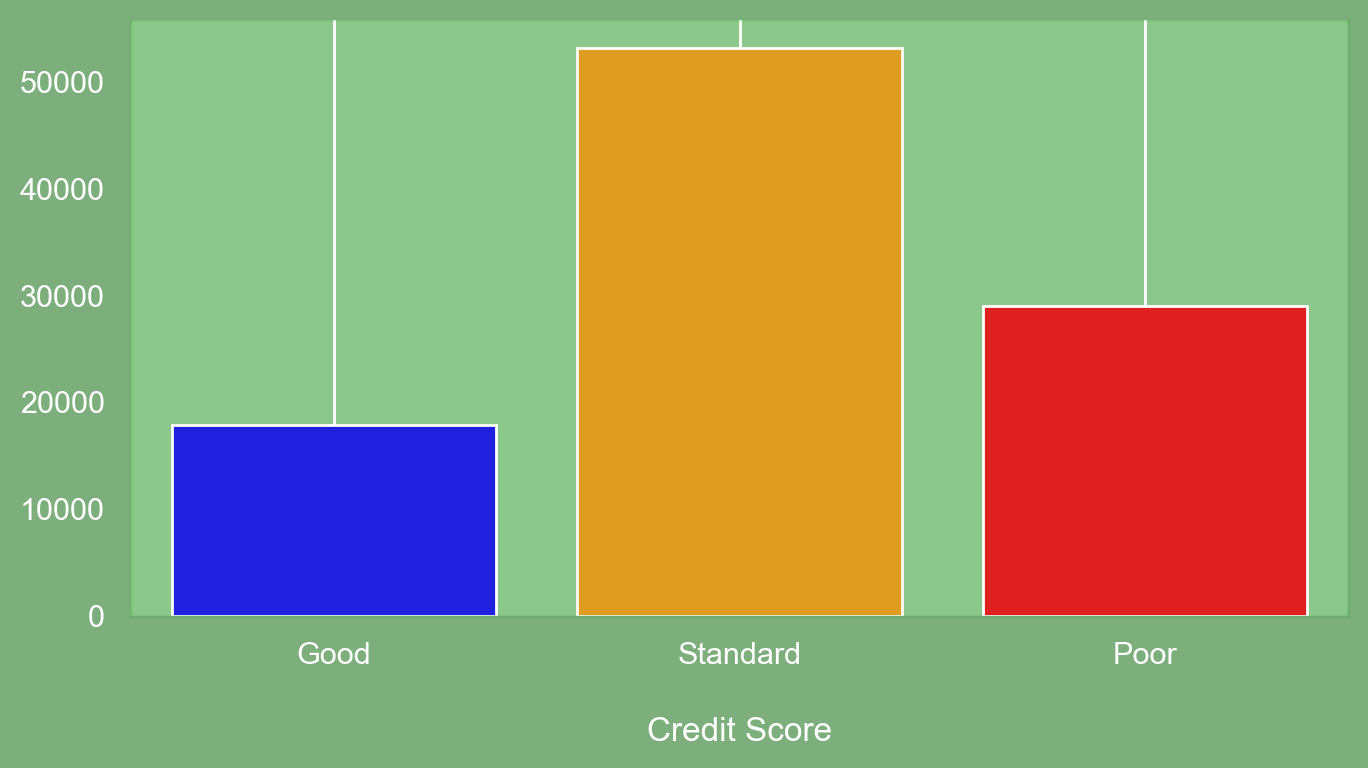

In [132]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.countplot(x = "Credit_Score", data = df, palette = ["blue", "orange", "red"])

plt.grid(None)

plt.xlabel("\nCredit Score", color = "white")
plt.xticks(color = "white")
plt.ylabel(None)
plt.yticks(color = "white")

plt.tight_layout()
plt.show()

The _Credit_Score_ feature shows that the majority of the observations in this data set is of customers with a "Standard" credit score, with nearly half of the entire dataset classified as such.  The "Good" level of the feature is the classification with the least amount of datapoints, however it does not seem to be too much fewer than the "Poor" classification level.  This feature should than be good to use as a response variable.

### Interest Rate

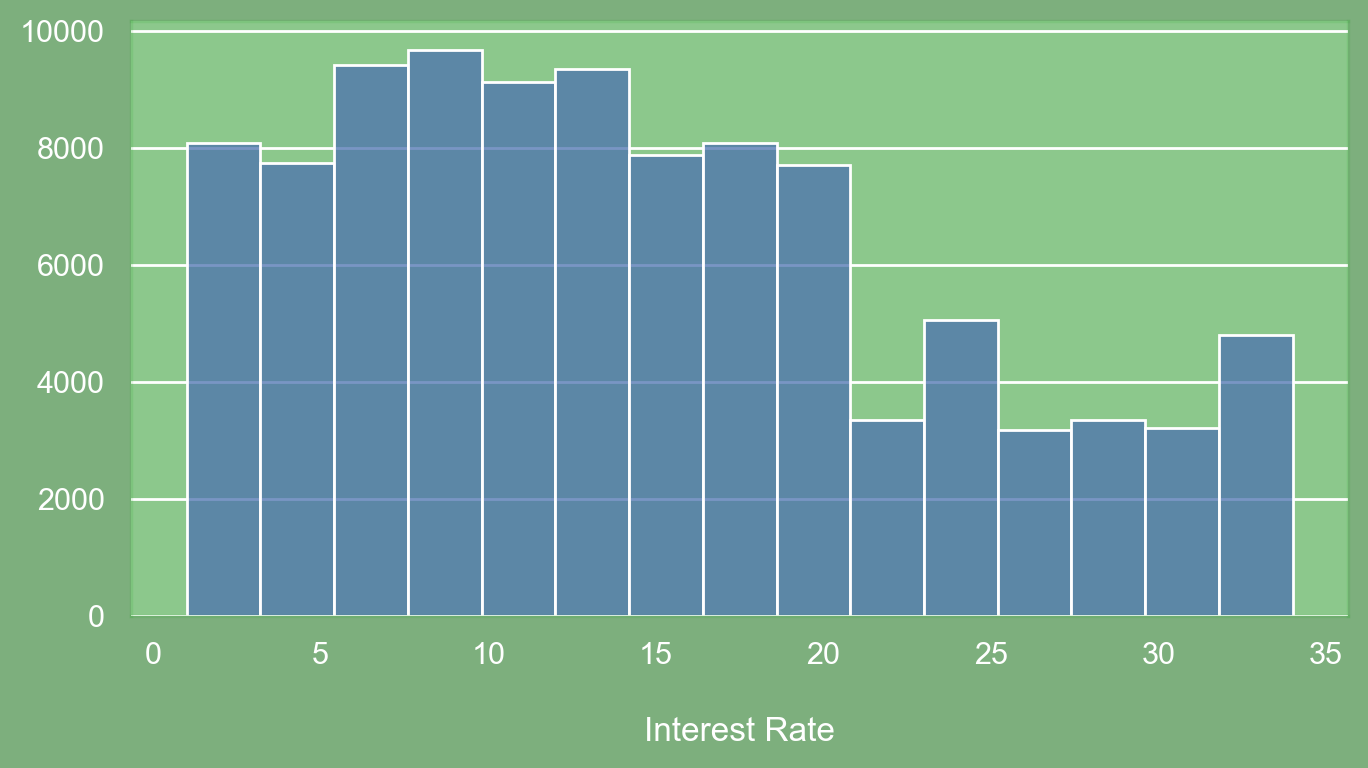

In [133]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.histplot(x = "Interest_Rate", data = df, bins = 15)

plt.grid(axis = 'x')

plt.xlabel("\nInterest Rate", color = "white")
plt.xticks(color = "white")
plt.ylabel(None)
plt.yticks(color = "white")

plt.tight_layout()
plt.show()

The historgram of the _Interest_Rate_ shows that the bulk of the interest rate distribution is below 20.  The descriptive statistics shows that the mean interest rate is 14.53 and the median is 13.  This indicates a slight right tail which can be seen in the histogram.  It would be interesting to see if the interest rate is a predictable feature utilizing the other features in this dataset.

### Payment of Minimum Amount

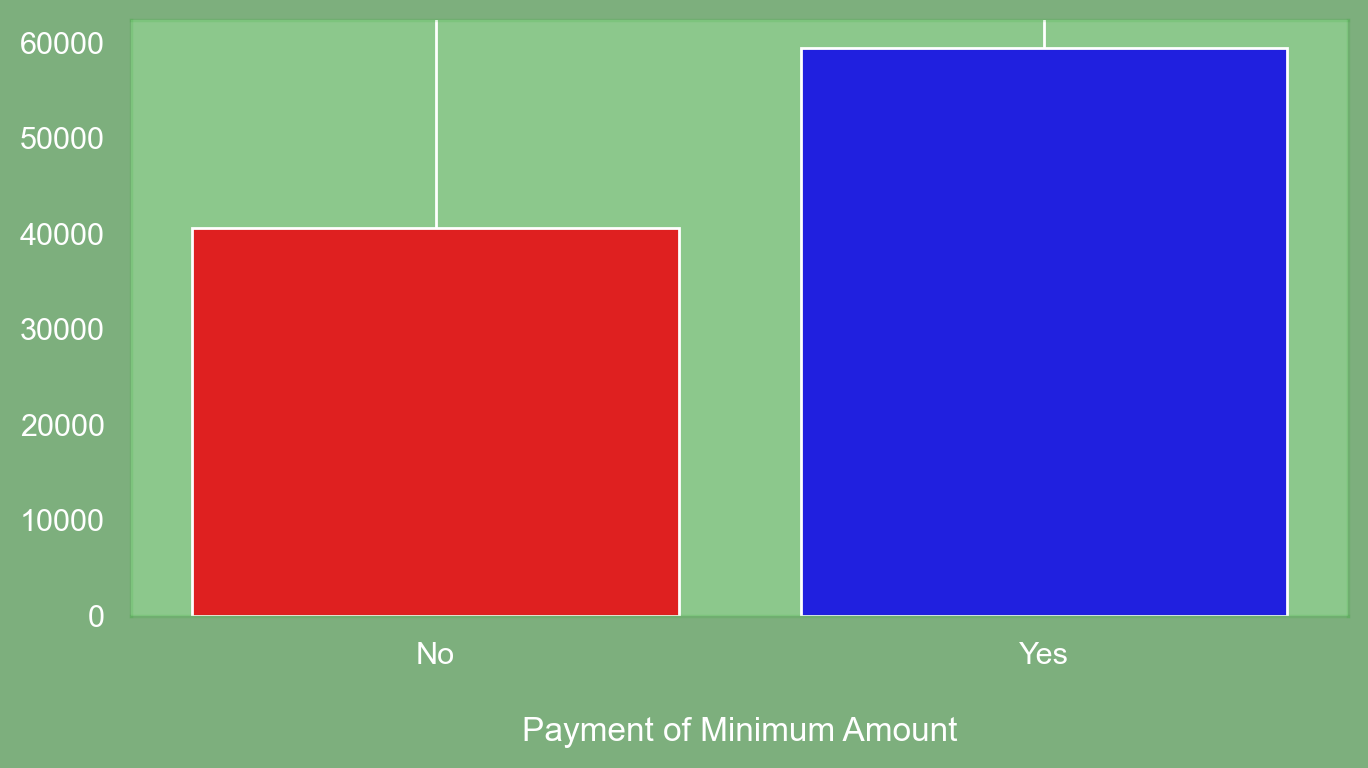

In [134]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.countplot(x = "Payment_of_Min_Amount", data = df, palette = ["red", "blue"])

plt.grid(None)

plt.xlabel("\nPayment of Minimum Amount", color = "white")
plt.xticks(color = "white")
plt.ylabel(None)
plt.yticks(color = "white")

plt.tight_layout()
plt.show()

The _Payment_of_MinAmount feature exactly evenly distributed, as we can see from the bar graph above.  However, with a seemingly 40-60 split, the quantity of each level of this categorical feature are not too unbalanced.  Depending on how the response variable is affected by the Payment of Minimum Amount, I believe this could be a good feature to use when building a predictive algorithm.

### Credit Utilization Ratio

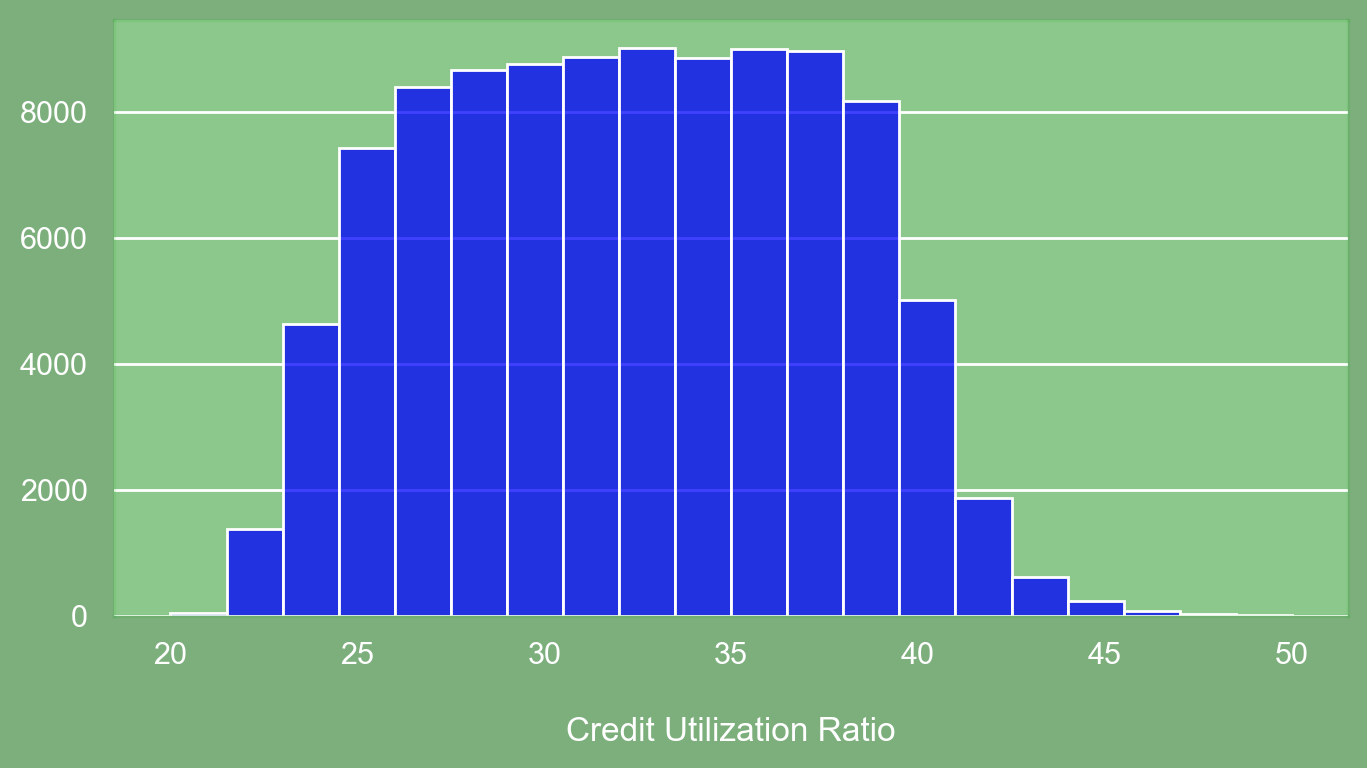

In [135]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.histplot(x = "Credit_Utilization_Ratio", data = df, bins = 20, color = "blue")

plt.grid(axis = 'x')

plt.xlabel("\nCredit Utilization Ratio", color = "white")
plt.xticks(color = "white")
plt.ylabel(None)
plt.yticks(color = "white")

plt.tight_layout()
plt.show()

With a minimum value at 20, a maximum value at 50, a median of 32.30, and a mean of 32.28, the _Credit_UtilizationRatio is a feature that is normally distributed according to the descriptive statistics and verified by its histogram.  What is unknown then is if this feature afcts the response variable is anyway.

### Delay from Due Date

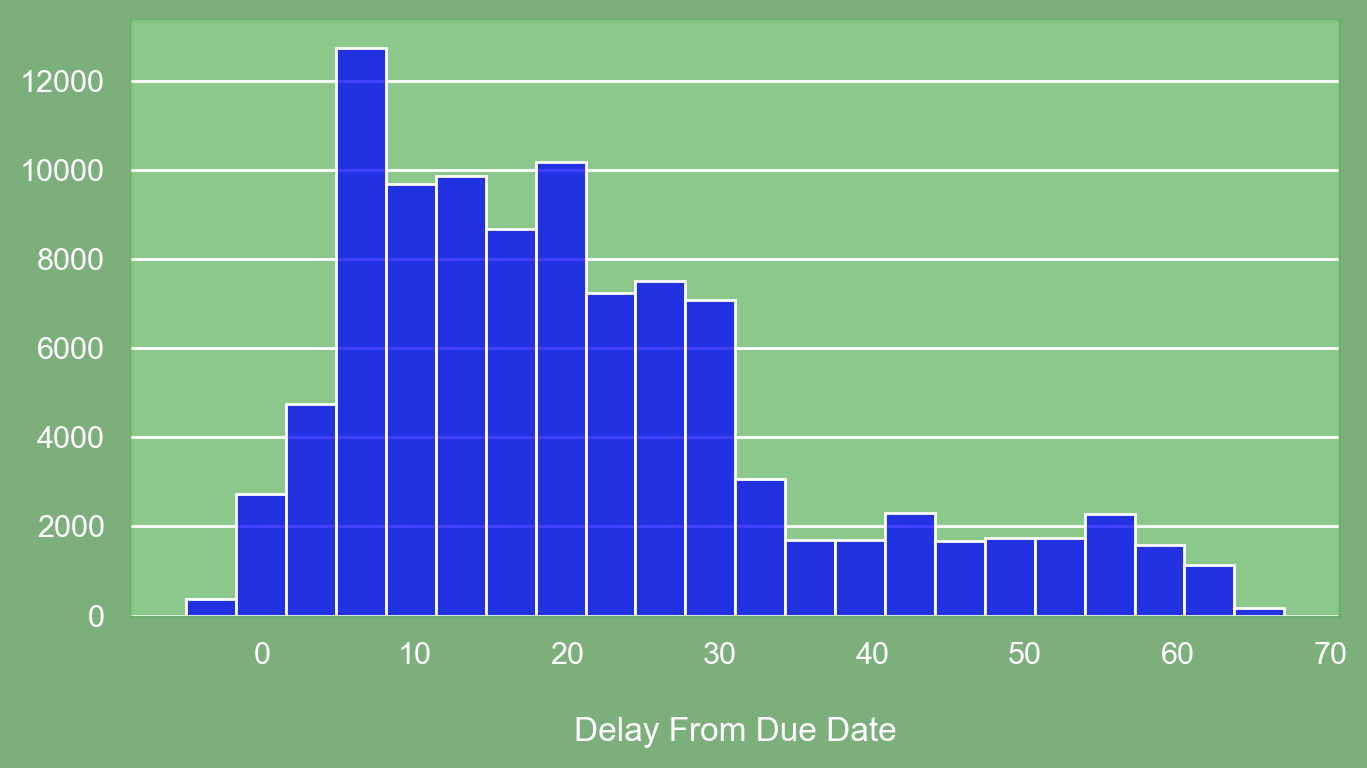

In [136]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.histplot(x = "Delay_from_due_date", data = df, color = "blue", bins = 22)

plt.grid(axis = 'x')

plt.xlabel("\nDelay From Due Date", color = "white")
plt.xticks(color = "white")
plt.ylabel(None)
plt.yticks(color = "white")

plt.tight_layout()
plt.show()

From the histogram of the _Delay_from_duedate feature, we can notice that for the most part the customers do not seem to delay the payments over 30 days on average.  The histogram shows that there seems to be some outliers that create a right skewness to the graph, but that otherwise the average delay days seems to be between 10 and 20.  In fact, perhaps the right tail of this graph may be indicative of a specific level of the response variable.

## 6. Explore Joint Attributes

### Credit Score and Credit History Age

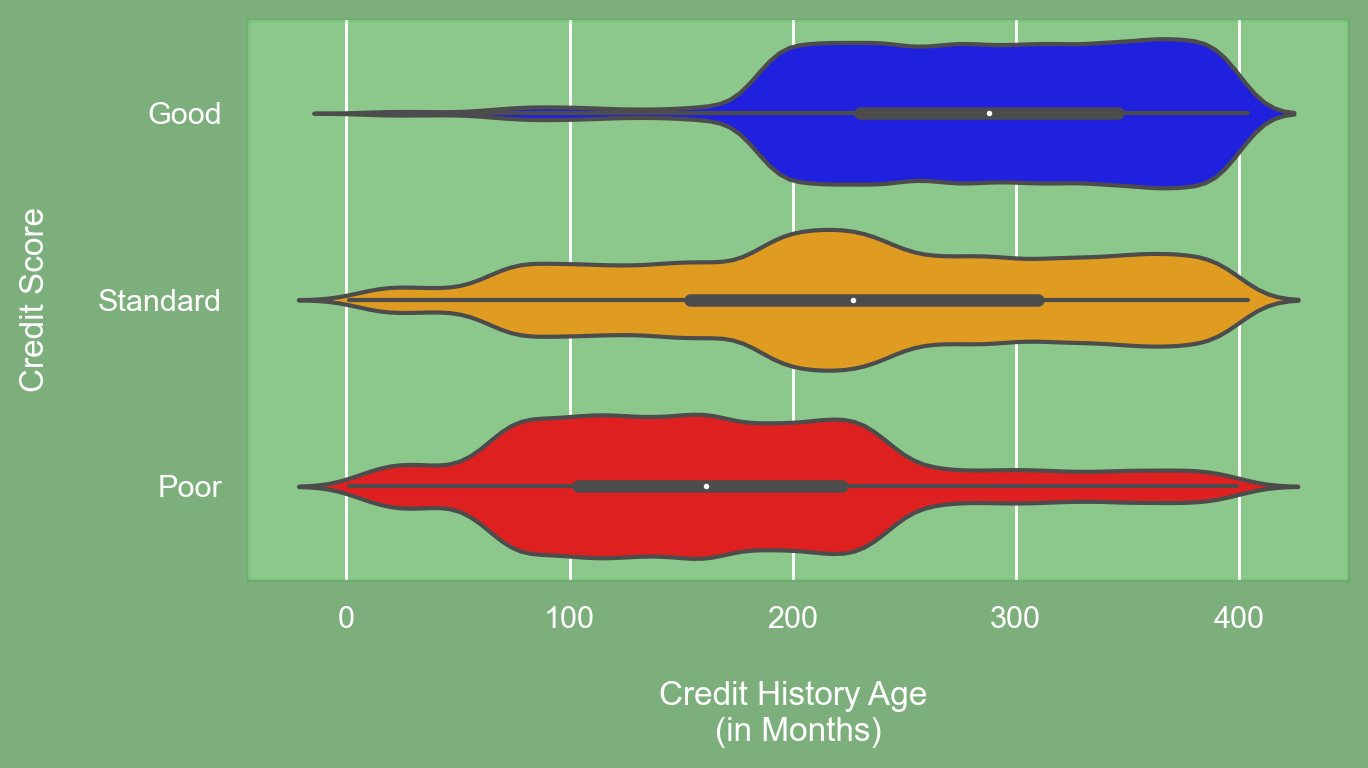

In [137]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.violinplot(x = "Credit_History_Age", y = "Credit_Score", data = df, palette = (["blue", "orange", "red"]))

plt.ylabel("Credit Score\n", color = "white")
plt.yticks(color = "white")
plt.xlabel("\nCredit History Age \n(in Months)", color = "white")
plt.xticks(color = "white")


plt.tight_layout()
plt.show()

This violin plot of the Credit History Age shows how the customers with good credit score tend to have more credit history than the customers with poor credit score.  The customers with the standard credit score seem to have a credit history more spread out.  This kind of illustrates that customers seem to improve their credit score with time.  The longer the credit history, the better the score and vice versa.

### Creedit Score and Delay from Due Date

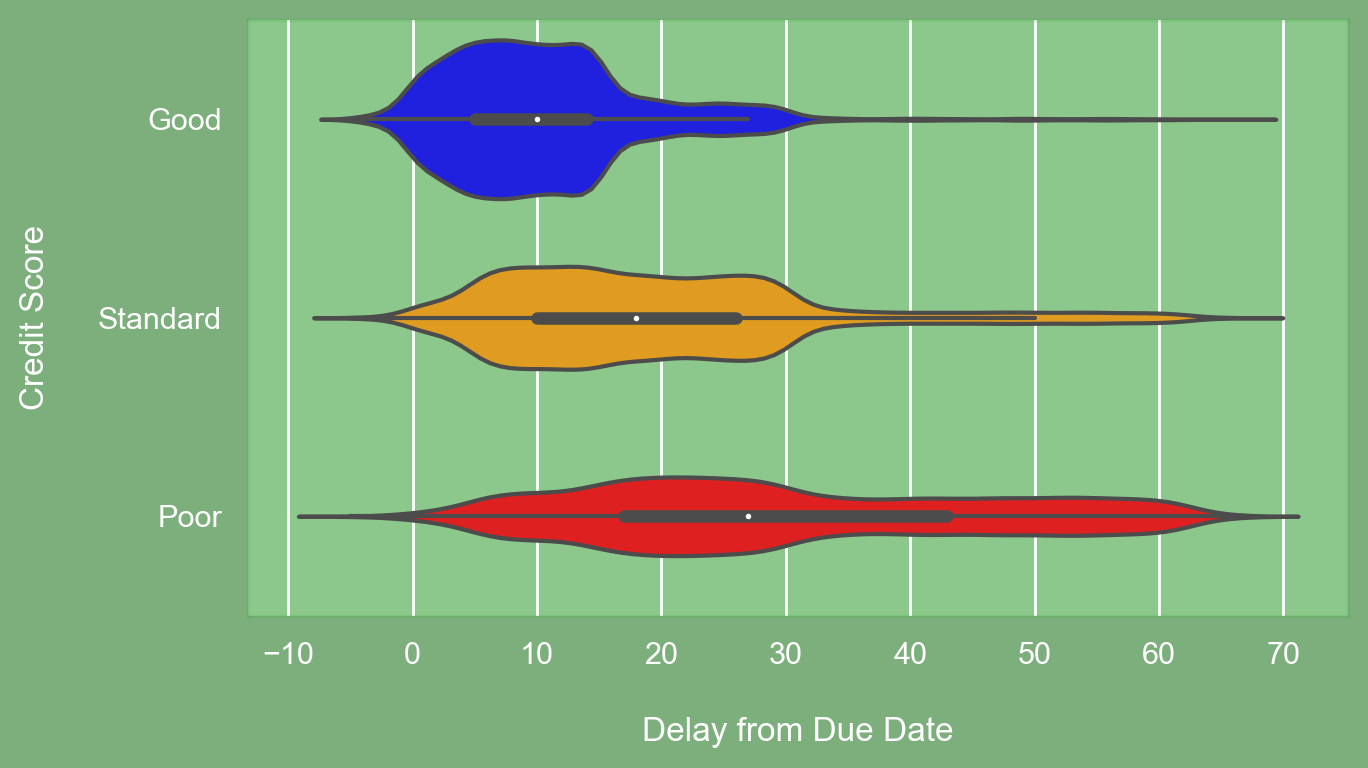

In [138]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.violinplot(x = "Delay_from_due_date", y = "Credit_Score", data = df, palette = (["blue", "orange", "red"]))

plt.ylabel("Credit Score\n", color = "white")
plt.yticks(color = "white")
plt.xlabel("\nDelay from Due Date", color = "white")
plt.xticks(color = "white")


plt.tight_layout()
plt.show()

The Delay from Due Date violin plot shows that the customers with the good credit score have the tendency to delay their payments from the due date for a small period if any.  The customers with Poor credit score have a more ample delay period.  And the customers with standard credit score do seem to have a lower spread than the customers with poor credit, but more spread out than the customers with good credit.  The idea is that the less the payment is delayed from the due date, the better the customers score will be.

### Payment of Minimum Amount and Interest Rate

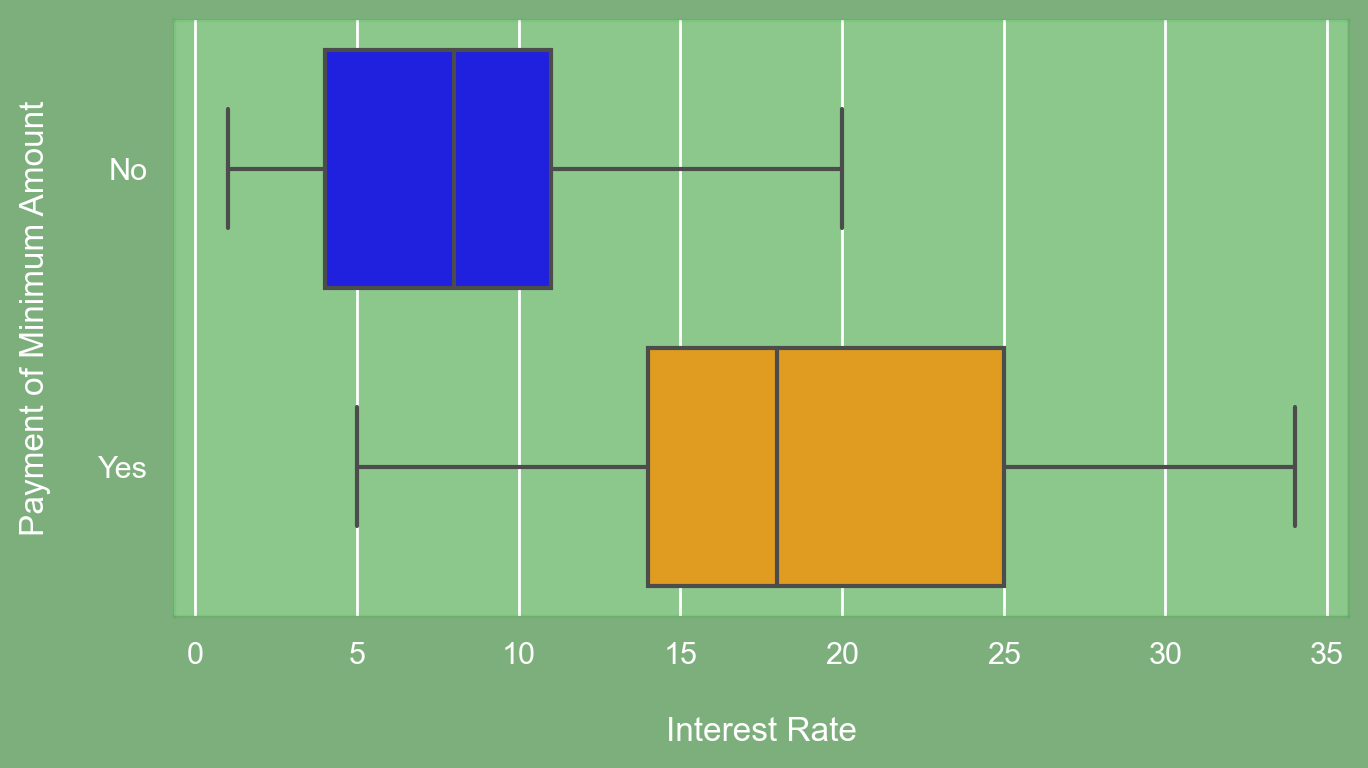

In [139]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.boxplot(x = "Interest_Rate", y = "Payment_of_Min_Amount", data = df, palette = ["blue", "orange"])

plt.ylabel("Payment of Minimum Amount\n", color = "white")
plt.yticks(color = "white")
plt.xlabel("\nInterest Rate", color = "white")
plt.xticks(color = "white")


plt.tight_layout()
plt.show()

This box plot shows that the customers who do not just pay he minimum amount for the credit card payment ofter have lower interest rates than those who do.  This could mean that the lower the interest rate the easier it is for the customer to pay off their credit card balance.

### Credit Score and Interest Rate

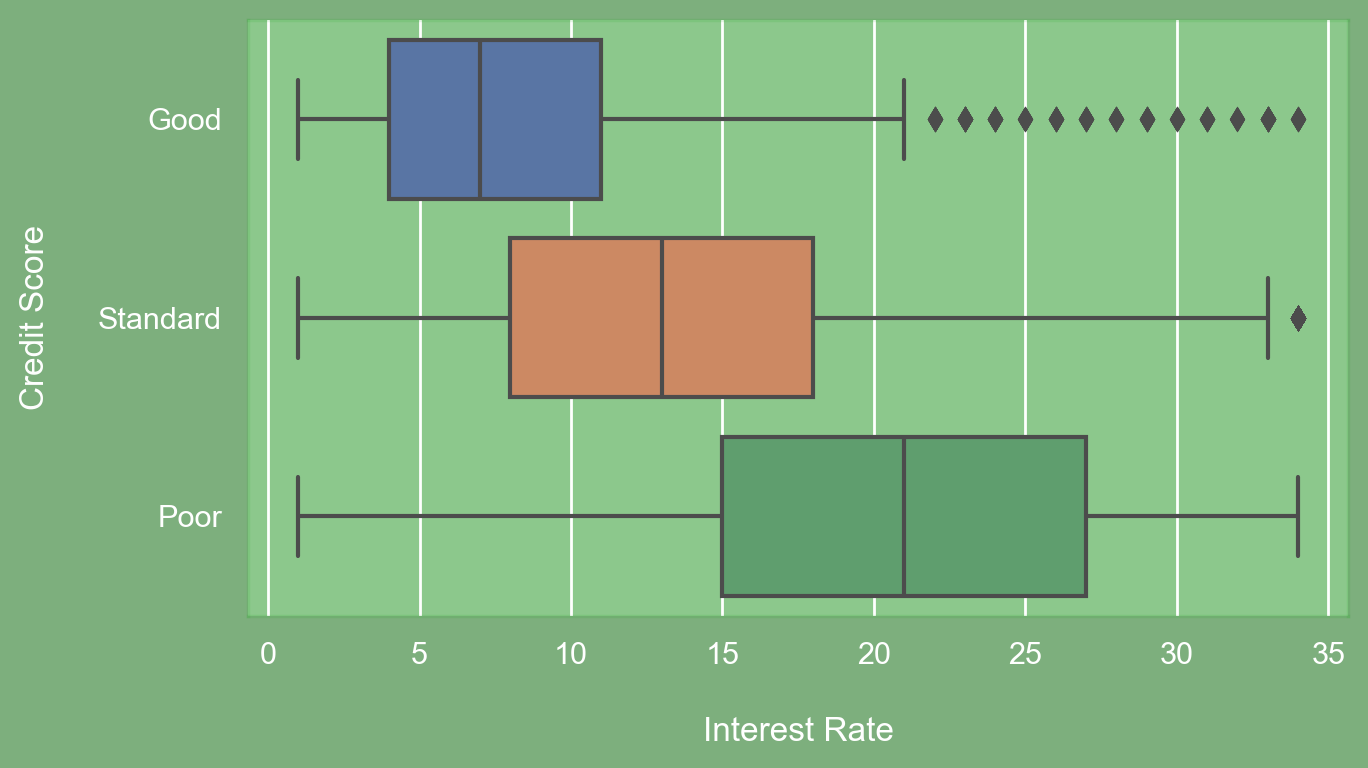

In [140]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.boxplot(x = "Interest_Rate", y = "Credit_Score", data = df)

plt.ylabel("Credit Score\n", color = "white")
plt.yticks(color = "white")
plt.xlabel("\nInterest Rate", color = "white")
plt.xticks(color = "white")


plt.tight_layout()
plt.show()

As shown on the previous graph, there's a relationship between Interest Rates and credit scores. The median interest rate paid by people with Good credit scores is substantially lower than the interest rate paid by those with standart or poor credit score.

### Payment of Minimum Amount and Number of Loans

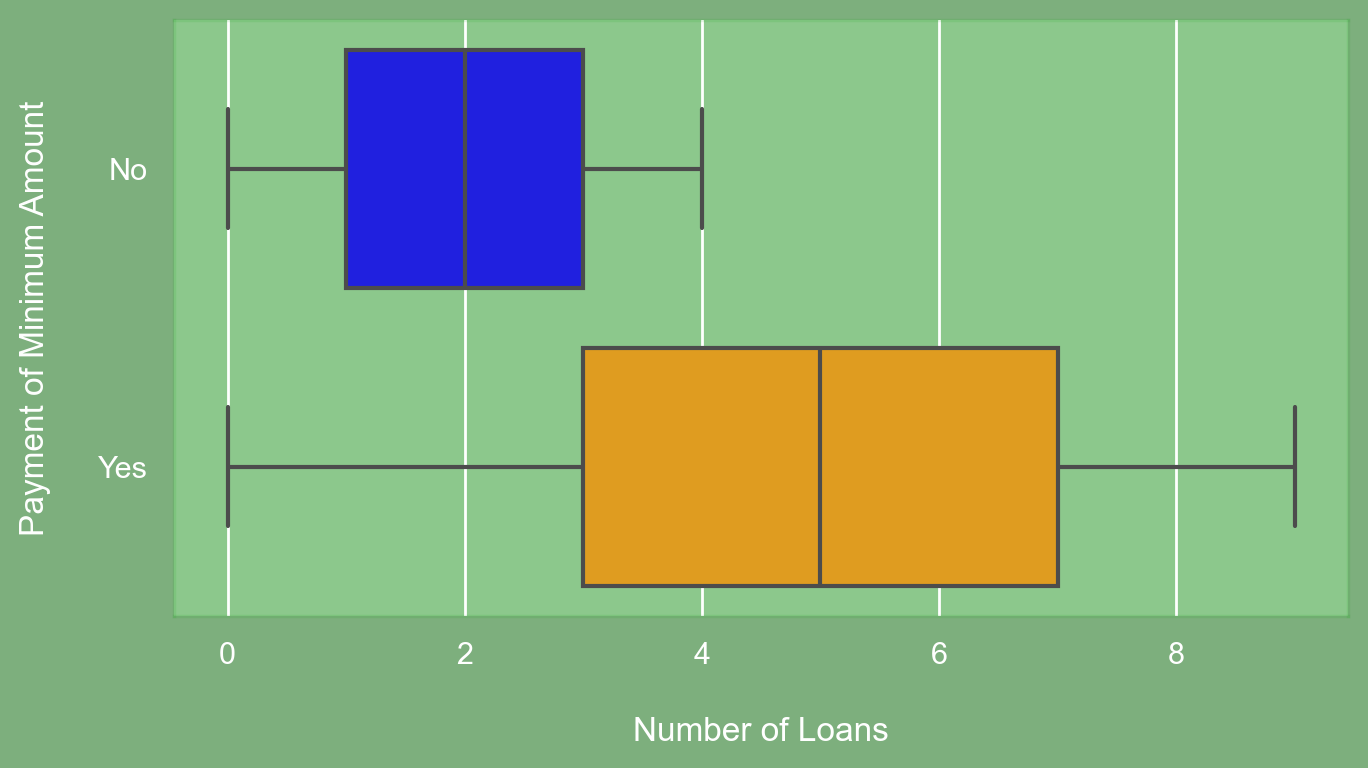

In [141]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.boxplot(x = "Num_of_Loan", y = "Payment_of_Min_Amount", data = df, palette = (["blue", "orange", "red"]))

plt.ylabel("Payment of Minimum Amount\n", color = "white")
plt.yticks(color = "white")
plt.xlabel("\nNumber of Loans", color = "white")
plt.xticks(color = "white")

plt.tight_layout()
plt.show()

This graph shows that those people with higher number of loans are more likely to pay the minimum amount on their loans compared to people with a smaller number oof loans.

### Number of Credit Cards and Credit Score

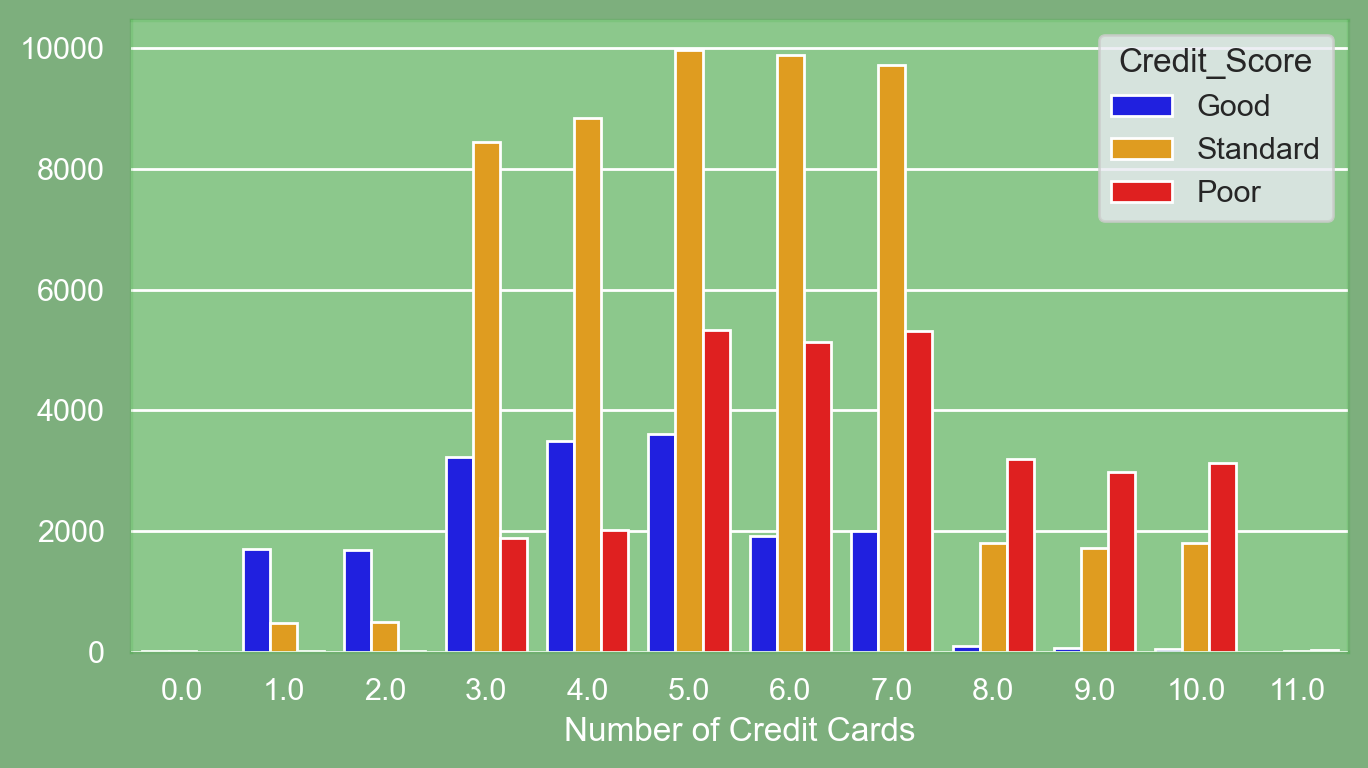

In [153]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.countplot(x = "Num_Credit_Card", hue = "Credit_Score", data = df, palette = ["blue", "orange", "red"])

plt.xlabel("Number of Credit Cards", color = "white")
plt.xticks(color = "white")
plt.ylabel(None)
plt.yticks(color = "white")

plt.tight_layout()
plt.show()

This graph shows the difference between good credit scores and poor credit scores. As seen on this distribution, most people with poor credit scores tend to have the highest number of credit cards than the rest of the groups.

### Payment of Minimun Amount and Credit Score

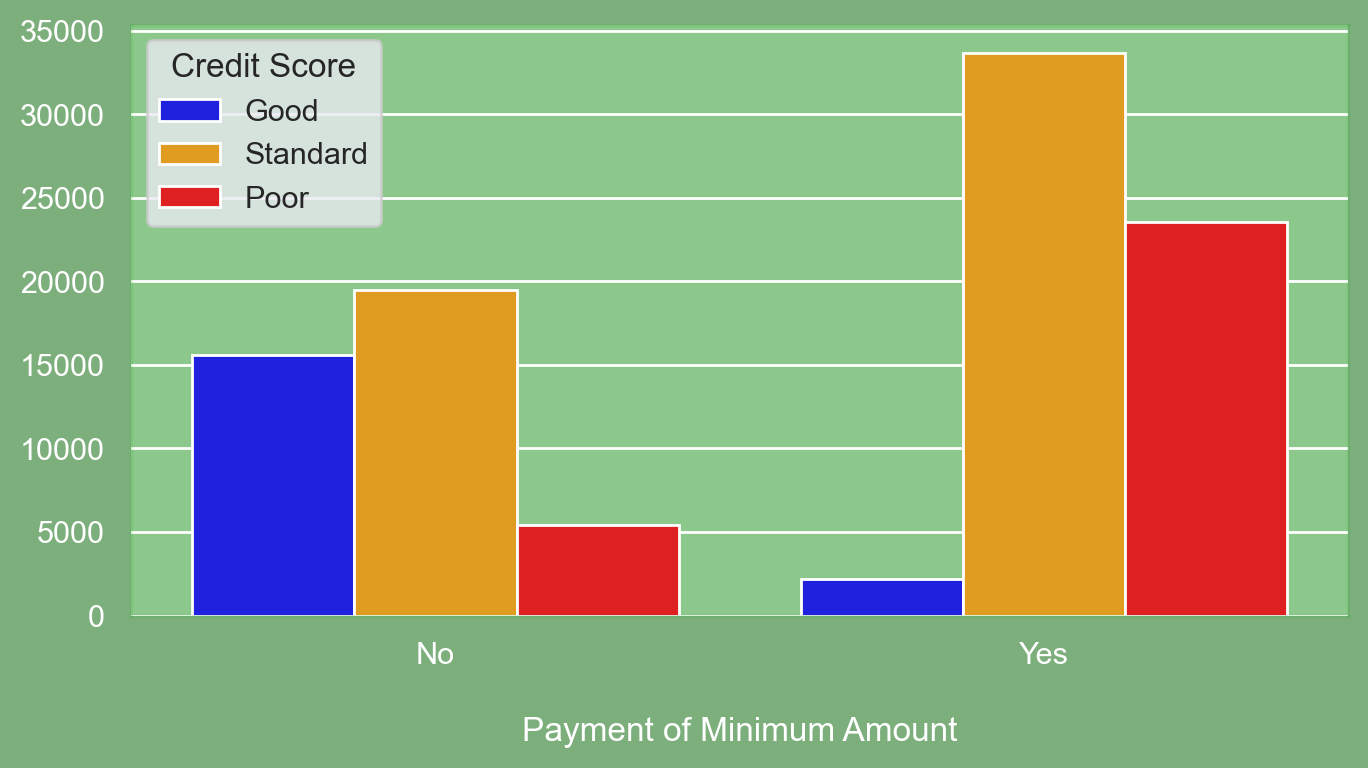

In [154]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.countplot(x = "Payment_of_Min_Amount", hue = "Credit_Score", data = df, palette = ["blue", "orange", "red"])

plt.ylabel(None)
plt.yticks(color = "white")
plt.xlabel("\nPayment of Minimum Amount", color = "white")
plt.xticks(color = "white")

plt.legend(title = "Credit Score")
plt.tight_layout()
plt.show()

This graph shows that there's a relationship between credit score and Payment of minimum amount. The biggest differences are seen in the groups of "Good" and "Poor" credit. While most people in the good credit category don't pay the minimum amount, most people in the poor credit category tend to only pay the minimum amount each month. 

## 7. Explore Attributes and Class

In [144]:
from statistics import mean
from statistics import mode
df_flat = df.groupby('Customer_ID').agg({'Age':mode,'Delay_from_due_date':mean,'Annual_Income':mean, 
                               'Num_Bank_Accounts':mode, 'Monthly_Inhand_Salary':mean,'Num_Credit_Card':mode, 'Interest_Rate':mean, 'Credit_Score':mode})
def late(row):
    if row['Delay_from_due_date'] > 25:
        return(1)
    else:
        return(0)
    
df_flat['Late_Payer'] = df_flat.apply(late, axis=1)
df_flat['Late_Payer']  = pd.to_numeric(df_flat['Late_Payer'])
df_flat['Credit_Score2'] = df_flat['Credit_Score']
df_flat['Credit_Score2'].replace(['Good', 'Standard','Poor'],[2,1,0],inplace = True)
df_flat.reset_index(inplace = True)

In the above cell a new dataframe named 'df_flat' is created to get the average statistics for each customer. This was done to help avoid repetitive data or too many data points when visualizing. 

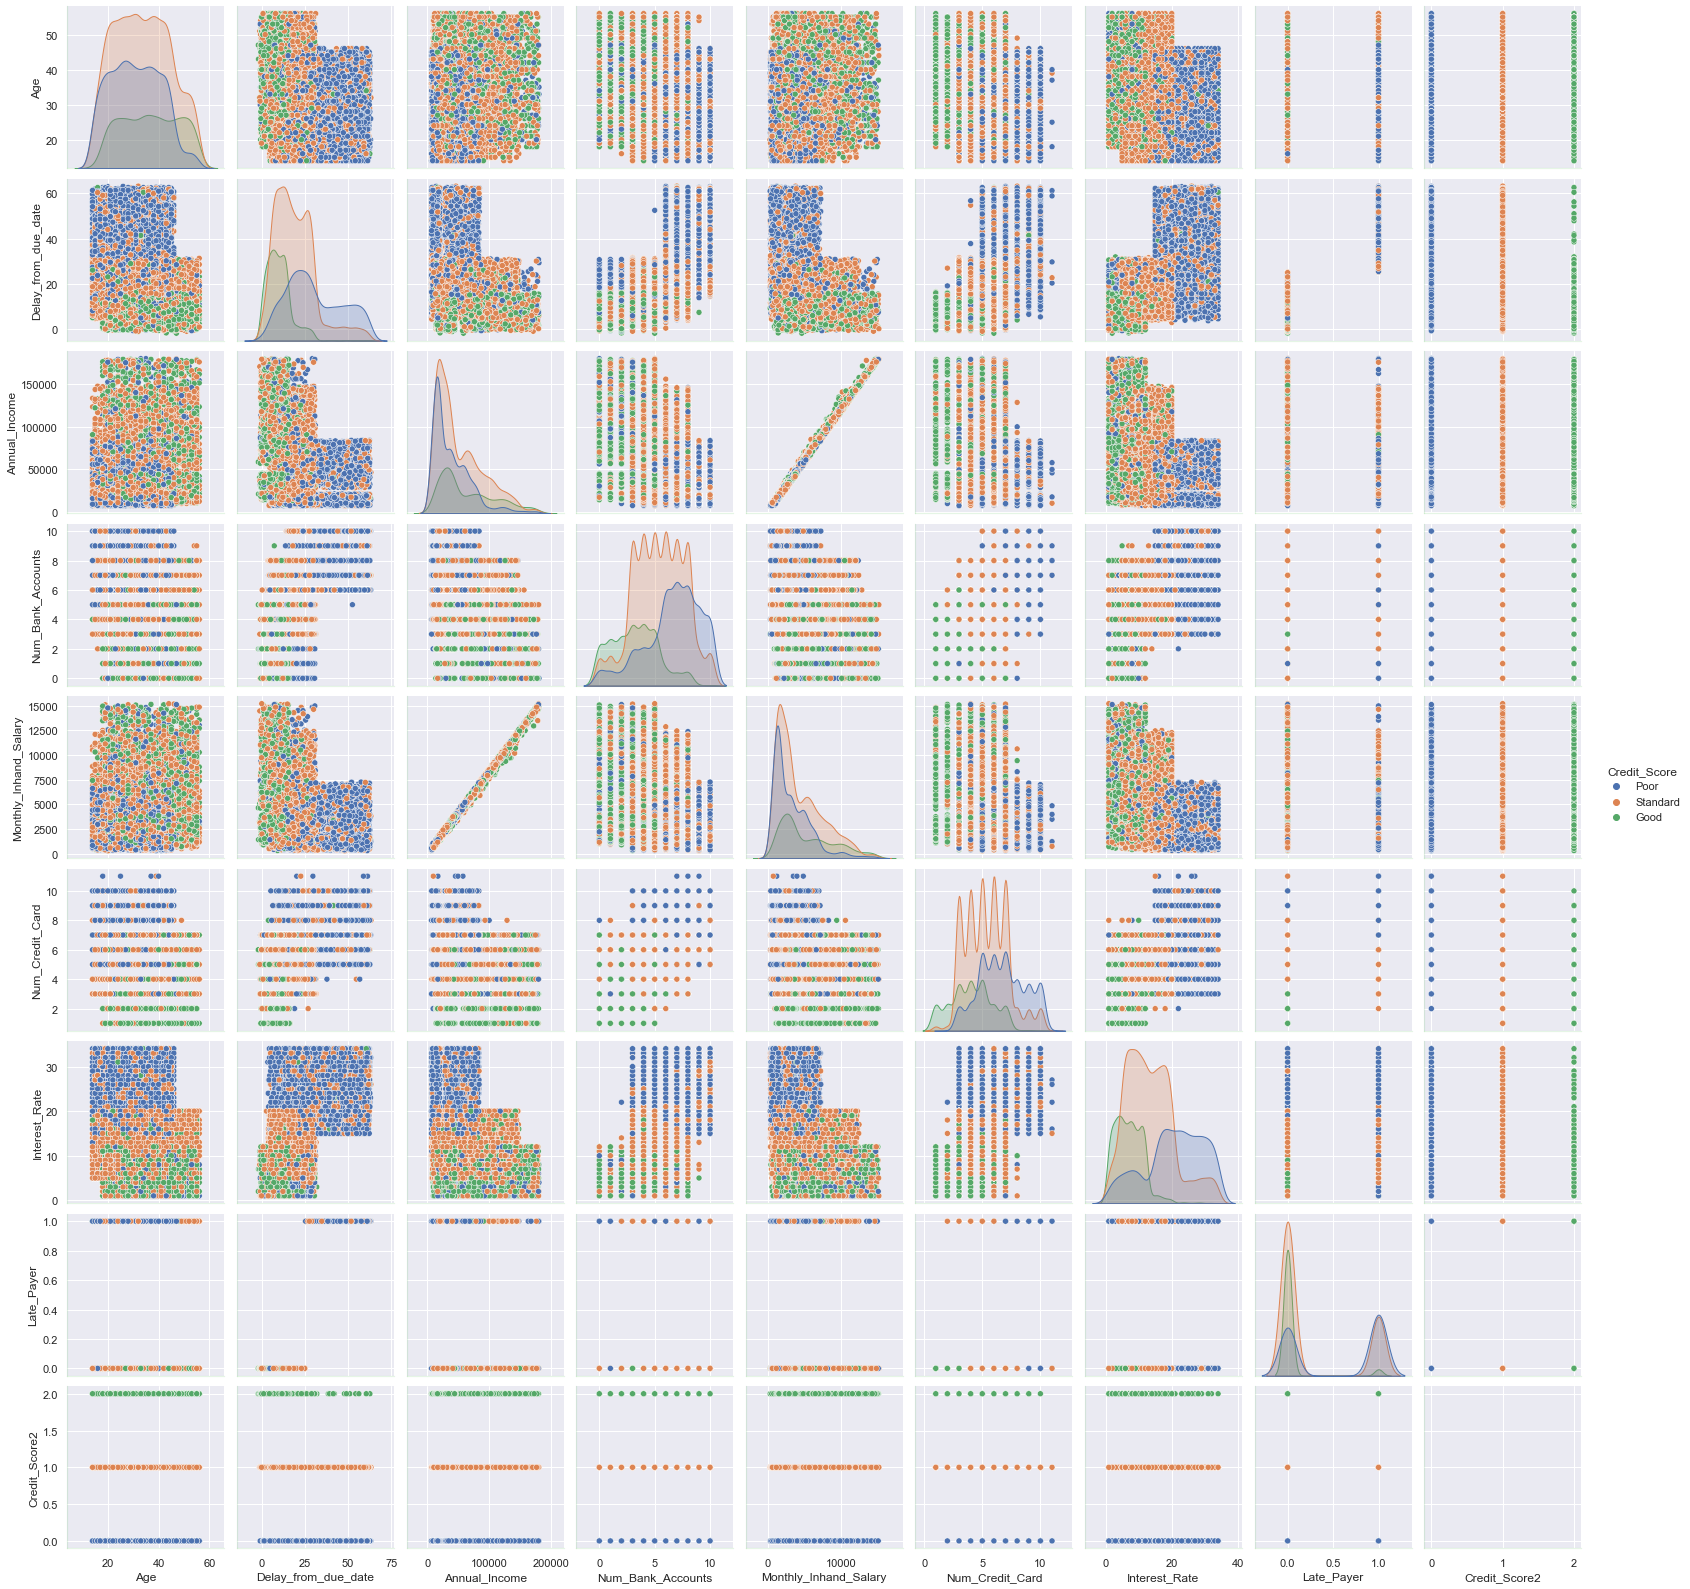

In [145]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(data = df_flat, hue = 'Credit_Score')

In [146]:
df_flat.corr().style.background_gradient(cmap="coolwarm")

,Age,Delay_from_due_date,Annual_Income,Num_Bank_Accounts,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Late_Payer,Credit_Score2
Age,1.000000,-0.175388,0.094156,-0.190702,0.090900,-0.148594,-0.217841,-0.141114,0.182705
Delay_from_due_date,-0.175388,1.000000,-0.249408,0.563396,-0.251042,0.482193,0.592583,0.813042,-0.486726
Annual_Income,0.094156,-0.249408,1.000000,-0.281641,0.998308,-0.217815,-0.302104,-0.191752,0.234684
Num_Bank_Accounts,-0.190702,0.563396,-0.281641,1.000000,-0.283317,0.442226,0.584301,0.447271,-0.434030
Monthly_Inhand_Salary,0.090900,-0.251042,0.998308,-0.283317,1.000000,-0.216963,-0.301913,-0.193232,0.235184
Num_Credit_Card,-0.148594,0.482193,-0.217815,0.442226,-0.216963,1.000000,0.497870,0.390124,-0.453161
Interest_Rate,-0.217841,0.592583,-0.302104,0.584301,-0.301913,0.497870,1.000000,0.473154,-0.542878
Late_Payer,-0.141114,0.813042,-0.191752,0.447271,-0.193232,0.390124,0.473154,1.000000,-0.383276
Credit_Score2,0.182705,-0.486726,0.234684,-0.434030,0.235184,-0.453161,-0.542878,-0.383276,1.000000


In the two cells above you will see a pairplot and a correlation matrix. In the pairplot the data put into scatterplots and the color/hue is based off of a customer's credit score classification. There are some correlations that we can see in the plots and corr matrix. 

- We can see that a slight negative correlation between age and interest rate; this is something with doman knowledge we might expect as the older a person is the more likely they will have a more established credit history giving them the oppurtunity for lower interest rate.  
- We also see that for delay payment from due date, number of bank accounts, and number of credit cards there is a positive correlation between these variables and interest rate. Paying late and opening many credit cards and bank accounts can be seen as riskier customer behaviors, so we would expect the interest rate to go up as these variables increase. And vice versa for these three variables and credit score we see a negative correlation. The later a person pays their bill and more bank accounts and credit cards they open the more this can hurt their credit score so we expect the negative correlation. * Credit score was coded to be an ordered variable with Poor being 0, Standard being 1, and Good being 2 *
- Another important correlation we found was that there is a negative correlation between credit score and interest rate. We would expect this because the better a person's credit score is the better (lower) interest rate we would expect them to recieve. 
- Something interesting to point out was that annual income did not have any significant relationships with credit score.

(For all of the above correlations mentioned it is important to note that correlation does not mean causation. These variables will be important to keep in mind when creating predictive models however are not garunteed to be accurate predictors.)

## 8. New Features

In the cell below a feature is created to determine if a customer is a 'serial' late payer. Credit companies will typically give a customer a grace period in which they need to pay their minimum balance a common grace period is about 25 days. We created a feature 'Late_Payer' which signifies a 1 (late payer) if a person on average pays their balance past a 25-day grace period or 0 (on-time payer) if a person typically makes their payment within the 25 days grace period. We thought this would be an important feature in predicting interest rate and/or credit score.

In [147]:
means_by_custID = df.groupby('Customer_ID').Delay_from_due_date.mean()
def late_p(row):
    cur_id = row['Customer_ID']
    avg_pay_amt = means_by_custID[row['Customer_ID']]
    if avg_pay_amt > 25:
        return(1)
    else:
        return(0)
df['Late_Payer'] = df.apply(late_p, axis=1)
df.Late_Payer.describe()

count    100000.000000
mean          0.323680
std           0.467882
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Late_Payer, dtype: float64

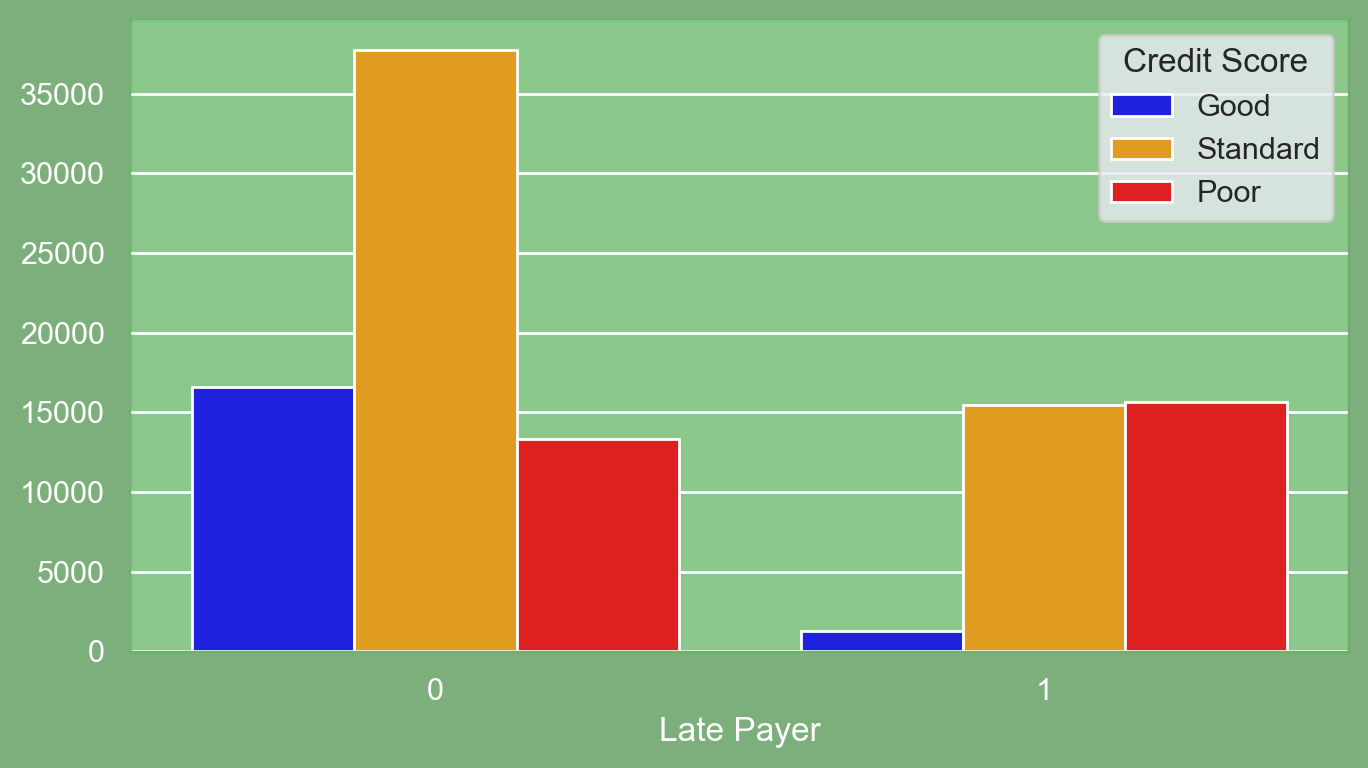

In [156]:
plt.figure(figsize = (7, 4), dpi = 200, facecolor = "#7DAF7D")

ax = plt.axes()
ax.set_facecolor("#8CC88C")

sns.countplot(x = "Late_Payer", hue = "Credit_Score", data = df, palette = ["blue", "orange", "red"])

plt.xlabel("Late Payer", color = "white")
plt.xticks(color = "white")
plt.ylabel(None)
plt.yticks(color = "white")

plt.legend(title = "Credit Score")
plt.tight_layout()
plt.show()

This newly created attribute called "Late Payer" shows that there's a relationship between credit score and late payments. The main difference is seen in the group of people with good credit scores, almost everyone in that group makes their payments on time.  

## 9. Exceptional Work

### PCA

In [149]:
from sklearn.preprocessing import StandardScaler
cols = ['Monthly_Inhand_Salary', 'Interest_Rate']
df2 = df_flat[cols]
X = StandardScaler().fit_transform(df2)

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2']) #PC = Principal component 
finalDf = pd.concat([principalDf,df_flat[['Credit_Score2']]], axis = 1)

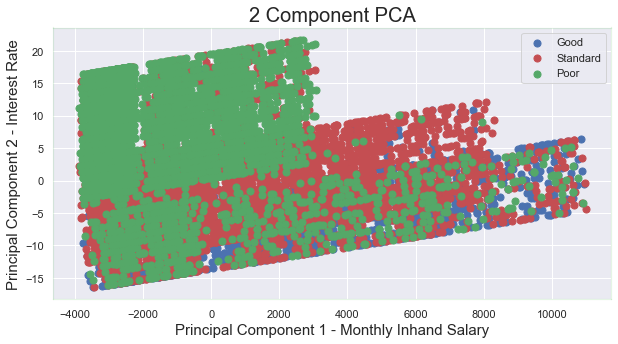

In [151]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1 - Monthly Inhand Salary', fontsize = 15)
ax.set_ylabel('Principal Component 2 - Interest Rate', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [2,1,0]

colors = ['b','r','g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Credit_Score2'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets,labels = ['Good','Standard','Poor'])
plt.show()

From the above graph, you can observe that the three categories of credit score 'Good', 'Standard', and 'Poor, when projected to a two-dimensional space, can be linearly separable up to some extent. We can also see that the 'Poor' and 'Standard' categories appears to be more spread out in comparison to the 'Good' category.

On top of the principal component analysis, we would like to include for exceptional work consideration the work done in the data cleaning part of the project.  During the data cleaning, we noticed how much work was going to need to make the data set usable for a predictive algorithm study.  The process of cleaning the data included checking the data types to make sure they were correct, eliminating characters that certainly did not belong in the values, such as the "\_" character, prior to tranforming them into numeric, filling missing values based on the customers' historic data, and dealing with unusually large or unrealistic values by once again utilizing the customers' historic data to fix those issues.

In [ ]:
# Saving the final dataframe into a .csv file
df.to_csv("financial_data.csv")